In [48]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot

from sklearn.model_selection import RandomizedSearchCV
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

plt.style.use('ggplot')


In [120]:
df = pd.read_csv('../data/loan_data.csv')

In [121]:
df['purpose']

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object

In [5]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [126]:
df

credit_policy             purpose  int_rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log_annual_inc    dti  fico  days_with_cr_line  revol_bal  revol_util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq_last_6mths  delinq_2yrs  pub_rec  unpaid  
0                  0            0        0       0  
1                  0            0        0       0  
2                  1            0        0       0  
3                  1            0        0       0  
4                  0            1        0       0  
...              ...          ...      ...     ...  
9573               2            0        0       1  
9574               5            0        0       1  
9575               8            0        0       1  
9576               5            0        0       1  
9577               6            0        0       1  

[9578 rows x 14 columns]

In [122]:
df = df.rename(columns={'not.fully.paid' : 'unpaid'}) 
cols = df.columns.tolist() 
cols = [col.replace('.', '_') for col in cols] 
df.columns = cols

In [7]:
# This is for graphing purposes only**********************

# cols = df.columns.tolist()
# cols = [col.replace('_', ' ') for col in cols]
# df.columns = cols

In [123]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [147]:
small_biz = df[df['purpose']=='educational']
paid_small_biz = small_biz[small_biz['unpaid']==0]
un_paid_small_biz = small_biz[small_biz['unpaid']==1]

In [148]:
paid_inq = paid_small_biz['inq_last_6mths'].mean()
unpaid_inq = un_paid_small_biz['inq_last_6mths'].mean()

In [146]:
print(paid_inq)
print(unpaid_inq)

1.6240875912408759
2.7681159420289854


In [149]:
un_paid_small_biz

credit_policy      purpose  int_rate  installment  log_annual_inc  \
140               1  educational    0.1249       100.35       10.279180   
193               1  educational    0.1028        29.16        9.392662   
710               1  educational    0.1134       329.00       10.141244   
807               1  educational    0.0832       251.88       10.622546   
833               1  educational    0.1324       338.10       11.532728   
...             ...          ...       ...          ...             ...   
9048              0  educational    0.1284       168.09       10.819778   
9080              0  educational    0.1316       135.09        9.852194   
9252              0  educational    0.1287       100.90        9.629051   
9498              0  educational    0.1426       267.59        9.878170   
9547              0  educational    0.1607       147.82        9.862666   

        dti  fico  days_with_cr_line  revol_bal  revol_util  inq_last_6mths  \
140   12.77   662        1110.000000        566        51.5               3   
193   16.70   687        2069.000000       3084        65.6               3   
710    8.79   692        3839.041667       1573        39.3               0   
807   17.60   797        6989.958333       7017         8.4               0   
833    7.31   667        3823.000000      27452        96.3               2   
...     ...   ...                ...        ...         ...             ...   
9048   8.66   737        4169.958333          0         0.0               6   
9080  24.25   682        1680.000000      15360        56.5               4   
9252  13.58   712        4891.000000          0        62.1               7   
9498  15.45   707        1710.041667       3910        38.2               6   
9547  16.19   667        1260.041667       4445        53.5               4   

      delinq_2yrs  pub_rec  unpaid  
140             1        0       1  
193             0        0       1  
710             0        0       1  
807             0        0       1  
833             0        0       1  
...           ...      ...     ...  
9048            0        0       1  
9080            0        0       1  
9252            0        0       1  
9498            1        0       1  
9547            0        0       1  

[69 rows x 14 columns]

In [150]:
less_than_3 = un_paid_small_biz[un_paid_small_biz['fico'] < 700]

In [151]:
less_than_3

credit_policy      purpose  int_rate  installment  log_annual_inc  \
140               1  educational    0.1249       100.35       10.279180   
193               1  educational    0.1028        29.16        9.392662   
710               1  educational    0.1134       329.00       10.141244   
833               1  educational    0.1324       338.10       11.532728   
910               1  educational    0.1608       492.76       11.570251   
1174              1  educational    0.1008        96.92       10.491274   
1490              1  educational    0.1241       185.43        9.998798   
1605              1  educational    0.1114        82.02       11.149197   
2129              1  educational    0.1695       171.01        9.615805   
2660              1  educational    0.1568       113.76        9.392662   
2794              1  educational    0.1474       172.69       10.950807   
3007              1  educational    0.1568        87.51       10.376860   
3650              1  educational    0.1158        79.24       10.165852   
3738              1  educational    0.1284       282.40       11.451050   
3837              1  educational    0.1253       167.34       10.308953   
5126              1  educational    0.1461       137.91       10.915016   
7694              1  educational    0.1704       276.48        9.541082   
7713              0  educational    0.1640       126.40       10.308953   
7774              0  educational    0.1438        61.86       10.596635   
7849              0  educational    0.1501       151.69       11.082143   
7864              0  educational    0.1407        82.11       10.545341   
7968              0  educational    0.1091       326.97       10.668955   
8089              0  educational    0.1501       495.79       10.308953   
8110              0  educational    0.1330       253.79       10.308953   
8152              0  educational    0.1425       171.50       11.050890   
8295              0  educational    0.1134       197.40        9.798127   
8436              0  educational    0.1450       123.06       10.203592   
8525              0  educational    0.1418       123.36       10.555813   
8532              0  educational    0.1261        83.77       10.050570   
8647              0  educational    0.1229       250.15       11.561716   
8722              0  educational    0.1349        42.42        9.798127   
8762              0  educational    0.1570       157.55       10.656082   
8769              0  educational    0.1412        71.90       10.645425   
8822              0  educational    0.1936        81.05       10.275051   
8923              0  educational    0.1821       507.62       11.270854   
8942              0  educational    0.1663       532.05       10.727663   
8993              0  educational    0.1663       177.35        9.852194   
9080              0  educational    0.1316       135.09        9.852194   
9547              0  educational    0.1607       147.82        9.862666   

        dti  fico  days_with_cr_line  revol_bal  revol_util  inq_last_6mths  \
140   12.77   662        1110.000000        566        51.5               3   
193   16.70   687        2069.000000       3084        65.6               3   
710    8.79   692        3839.041667       1573        39.3               0   
833    7.31   667        3823.000000      27452        96.3               2   
910   20.39   677        6269.958333      33627        74.7               1   
1174   6.90   697        2339.958333       8349        43.5               0   
1490  11.73   677        3539.958333       1212        22.9               3   
1605  20.15   692        5250.041667      51489        77.9               2   
2129   9.36   662        1267.041667       2368        84.6               1   
2660  11.80   672        1499.958333       3352        79.8               0   
2794   9.81   687        6120.000000       3335        45.1               2   
3007  23.88   667        1499.958333       8072        92

In [99]:
print(paid_inq)
print(unpaid_inq)

1.7852348993288591
2.3197674418604652


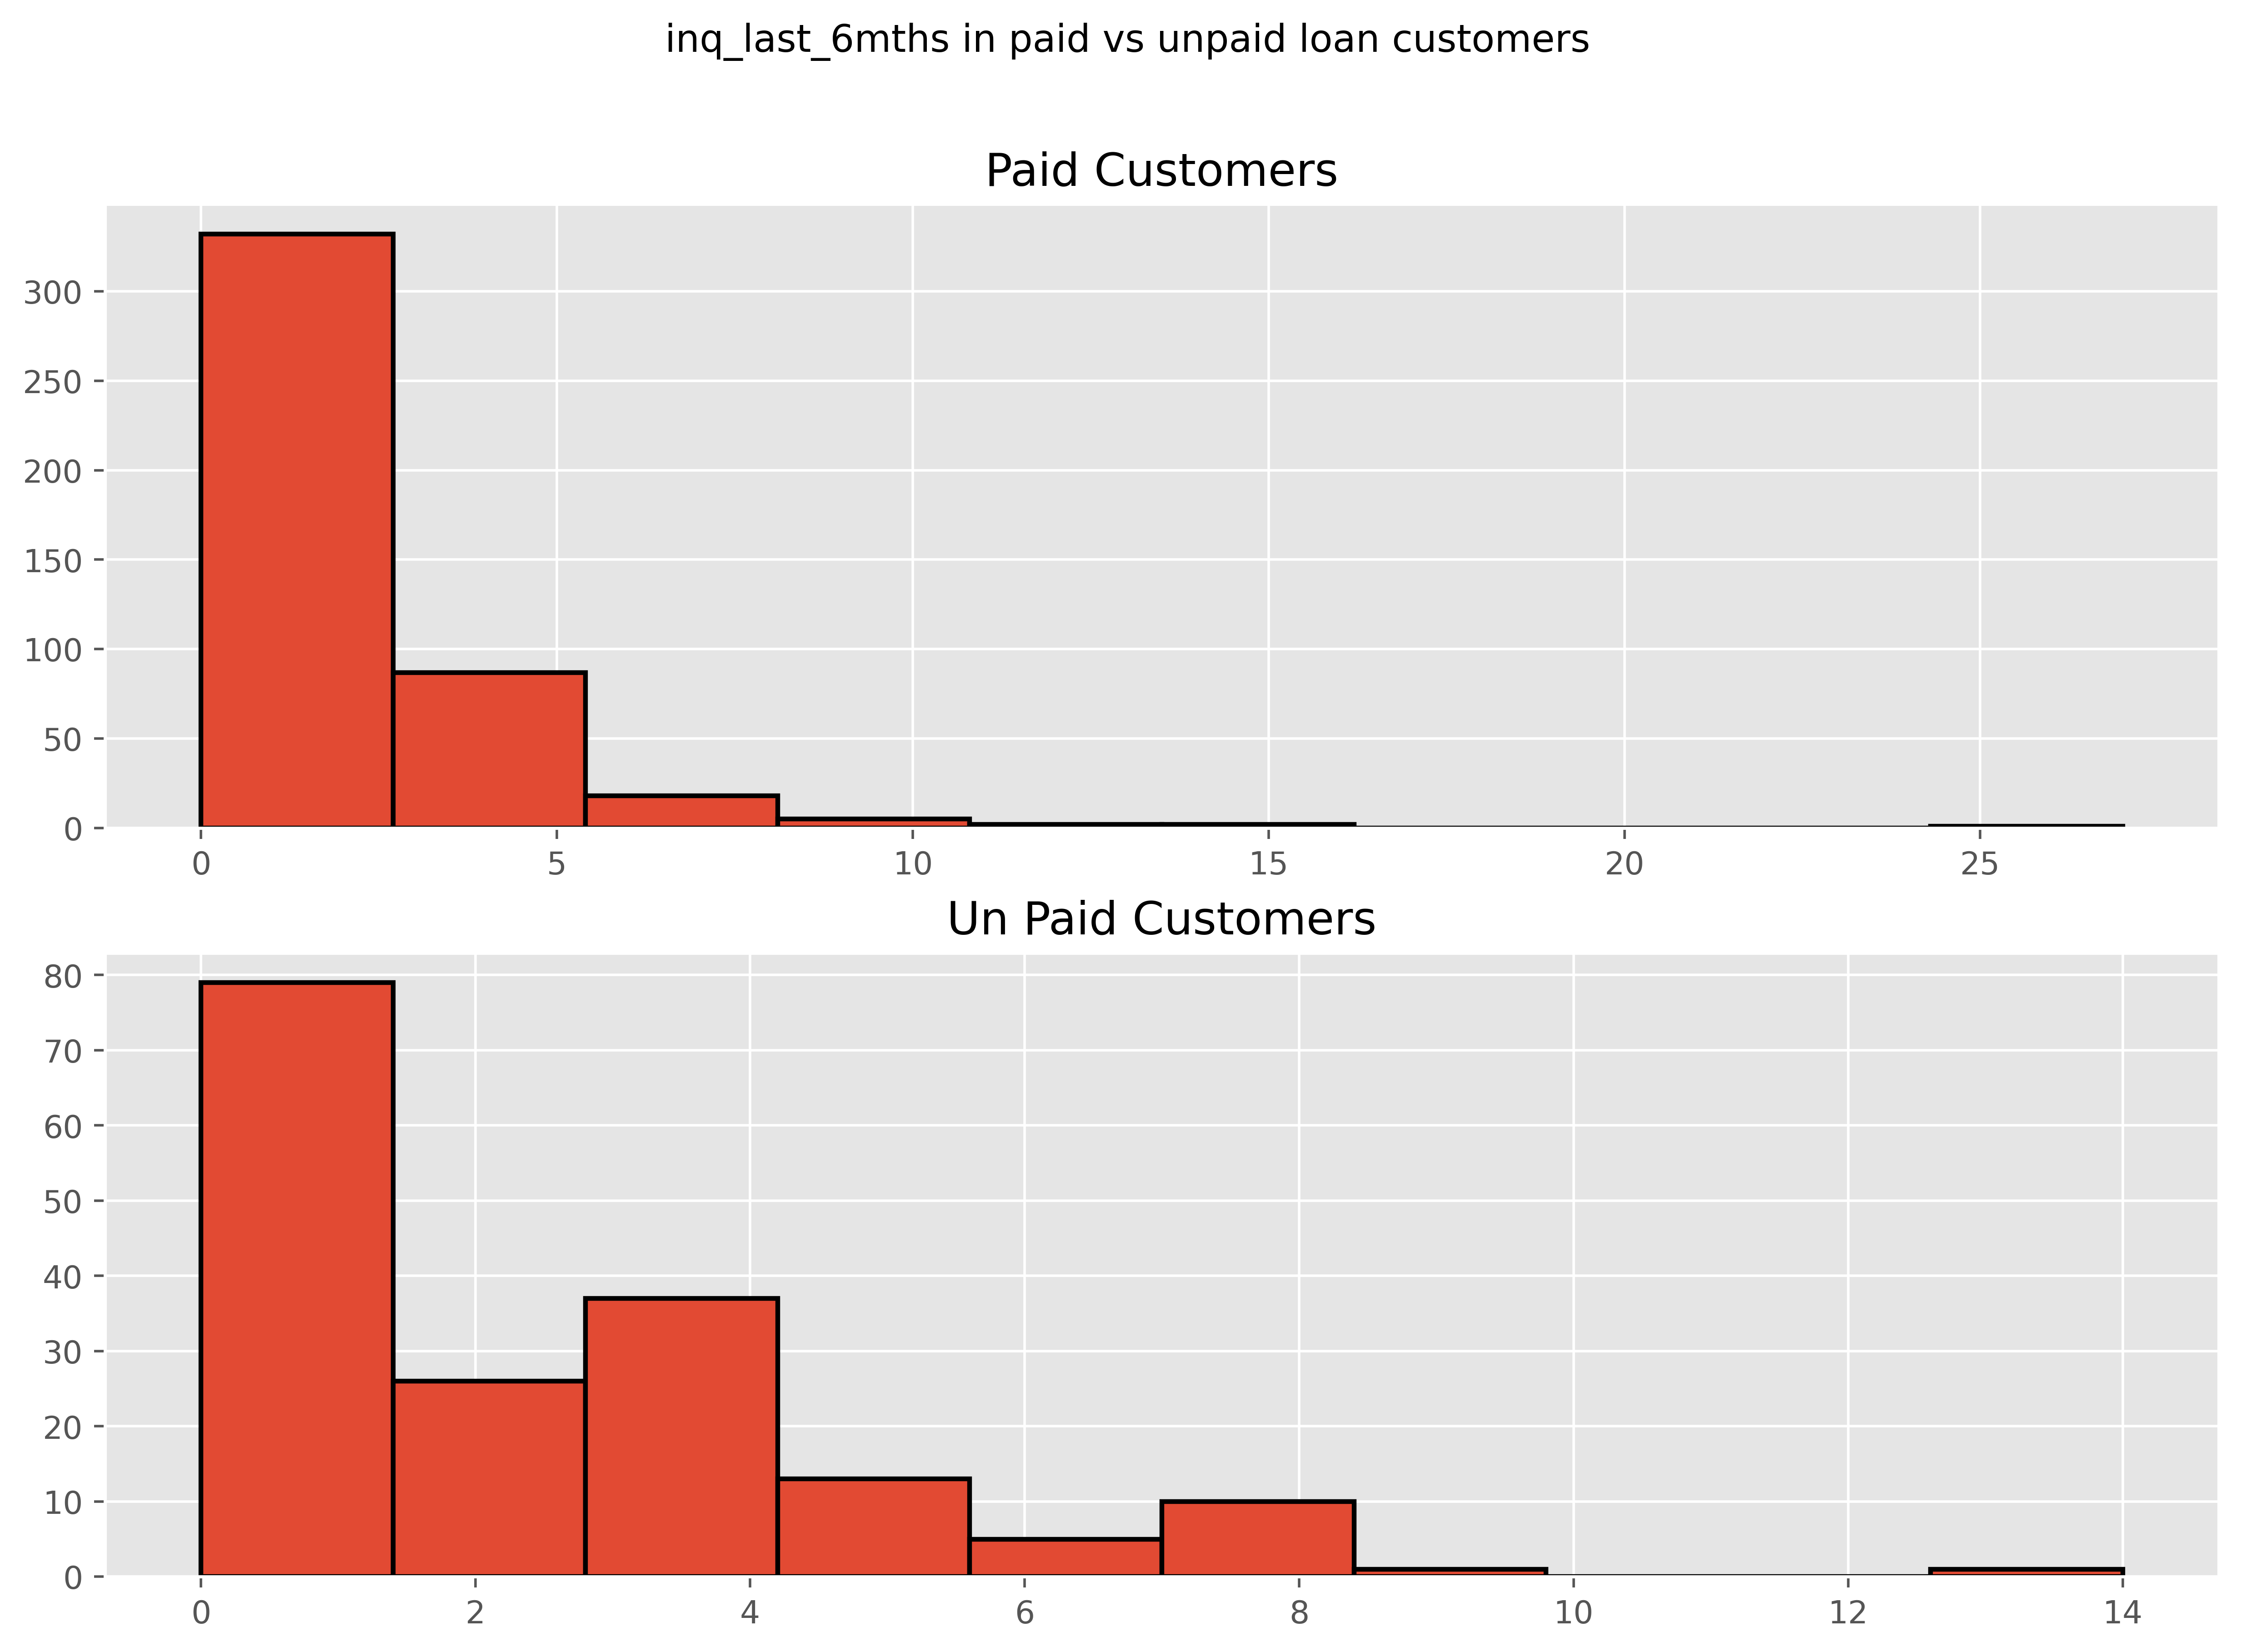

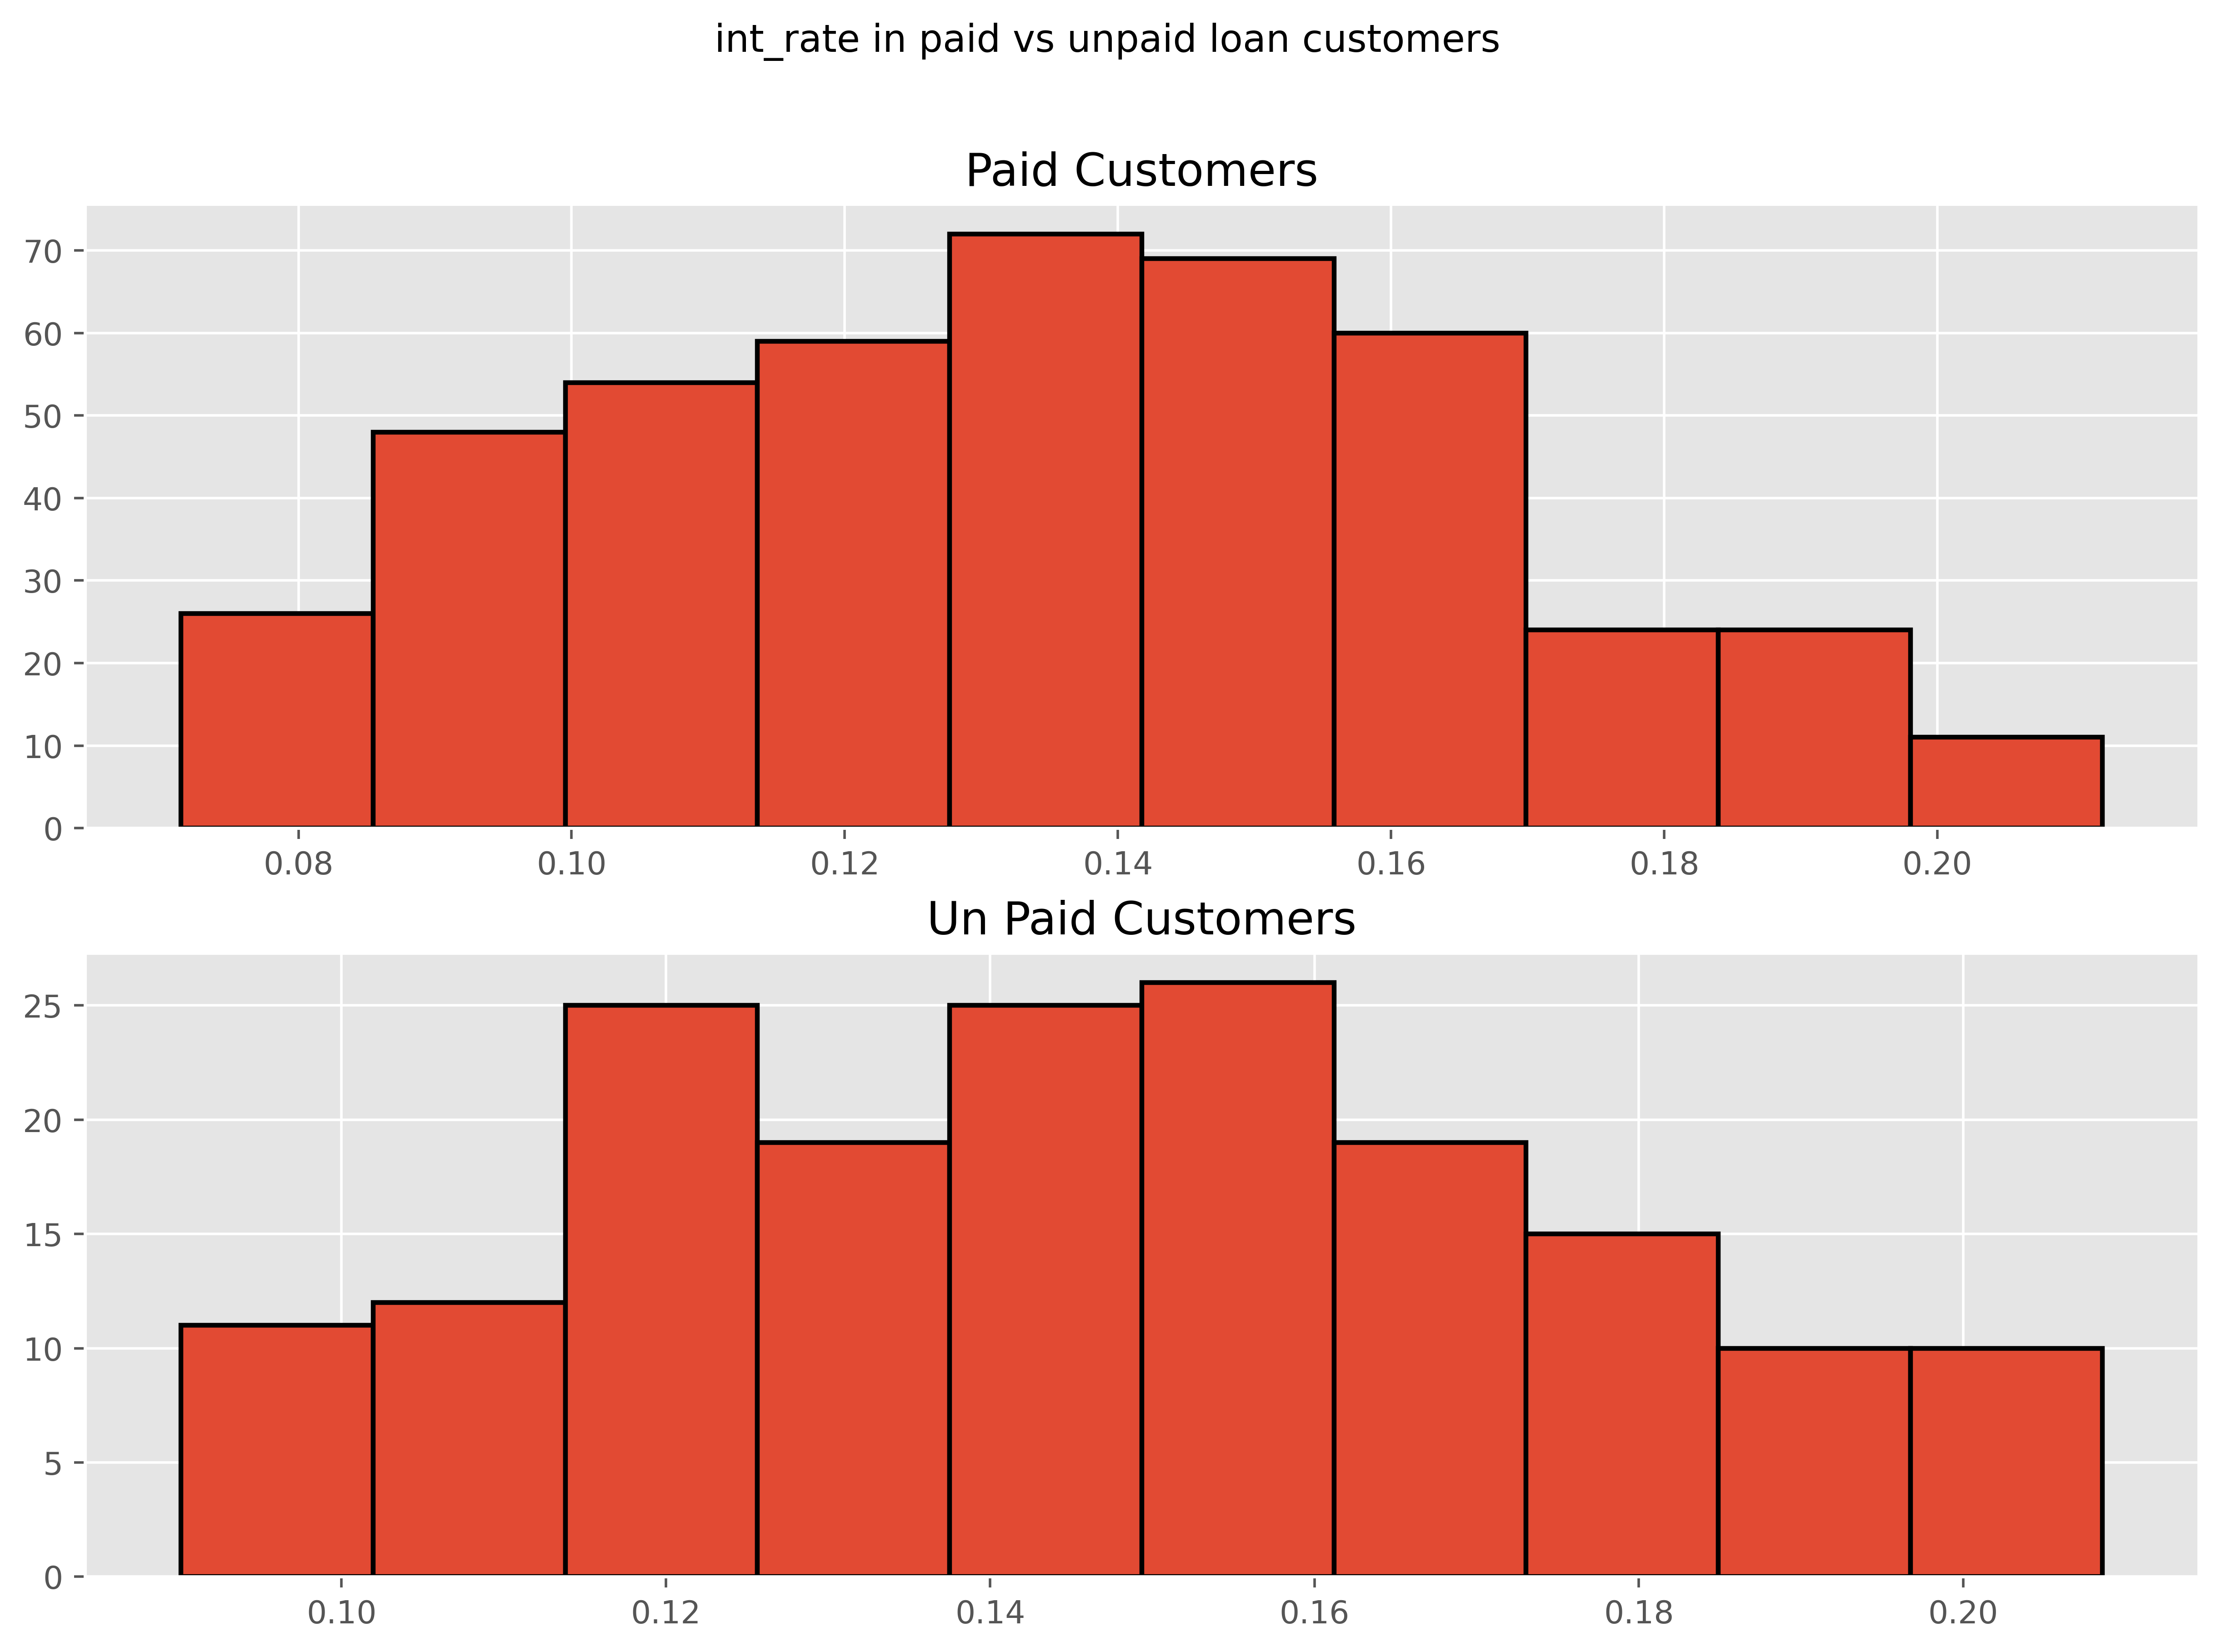

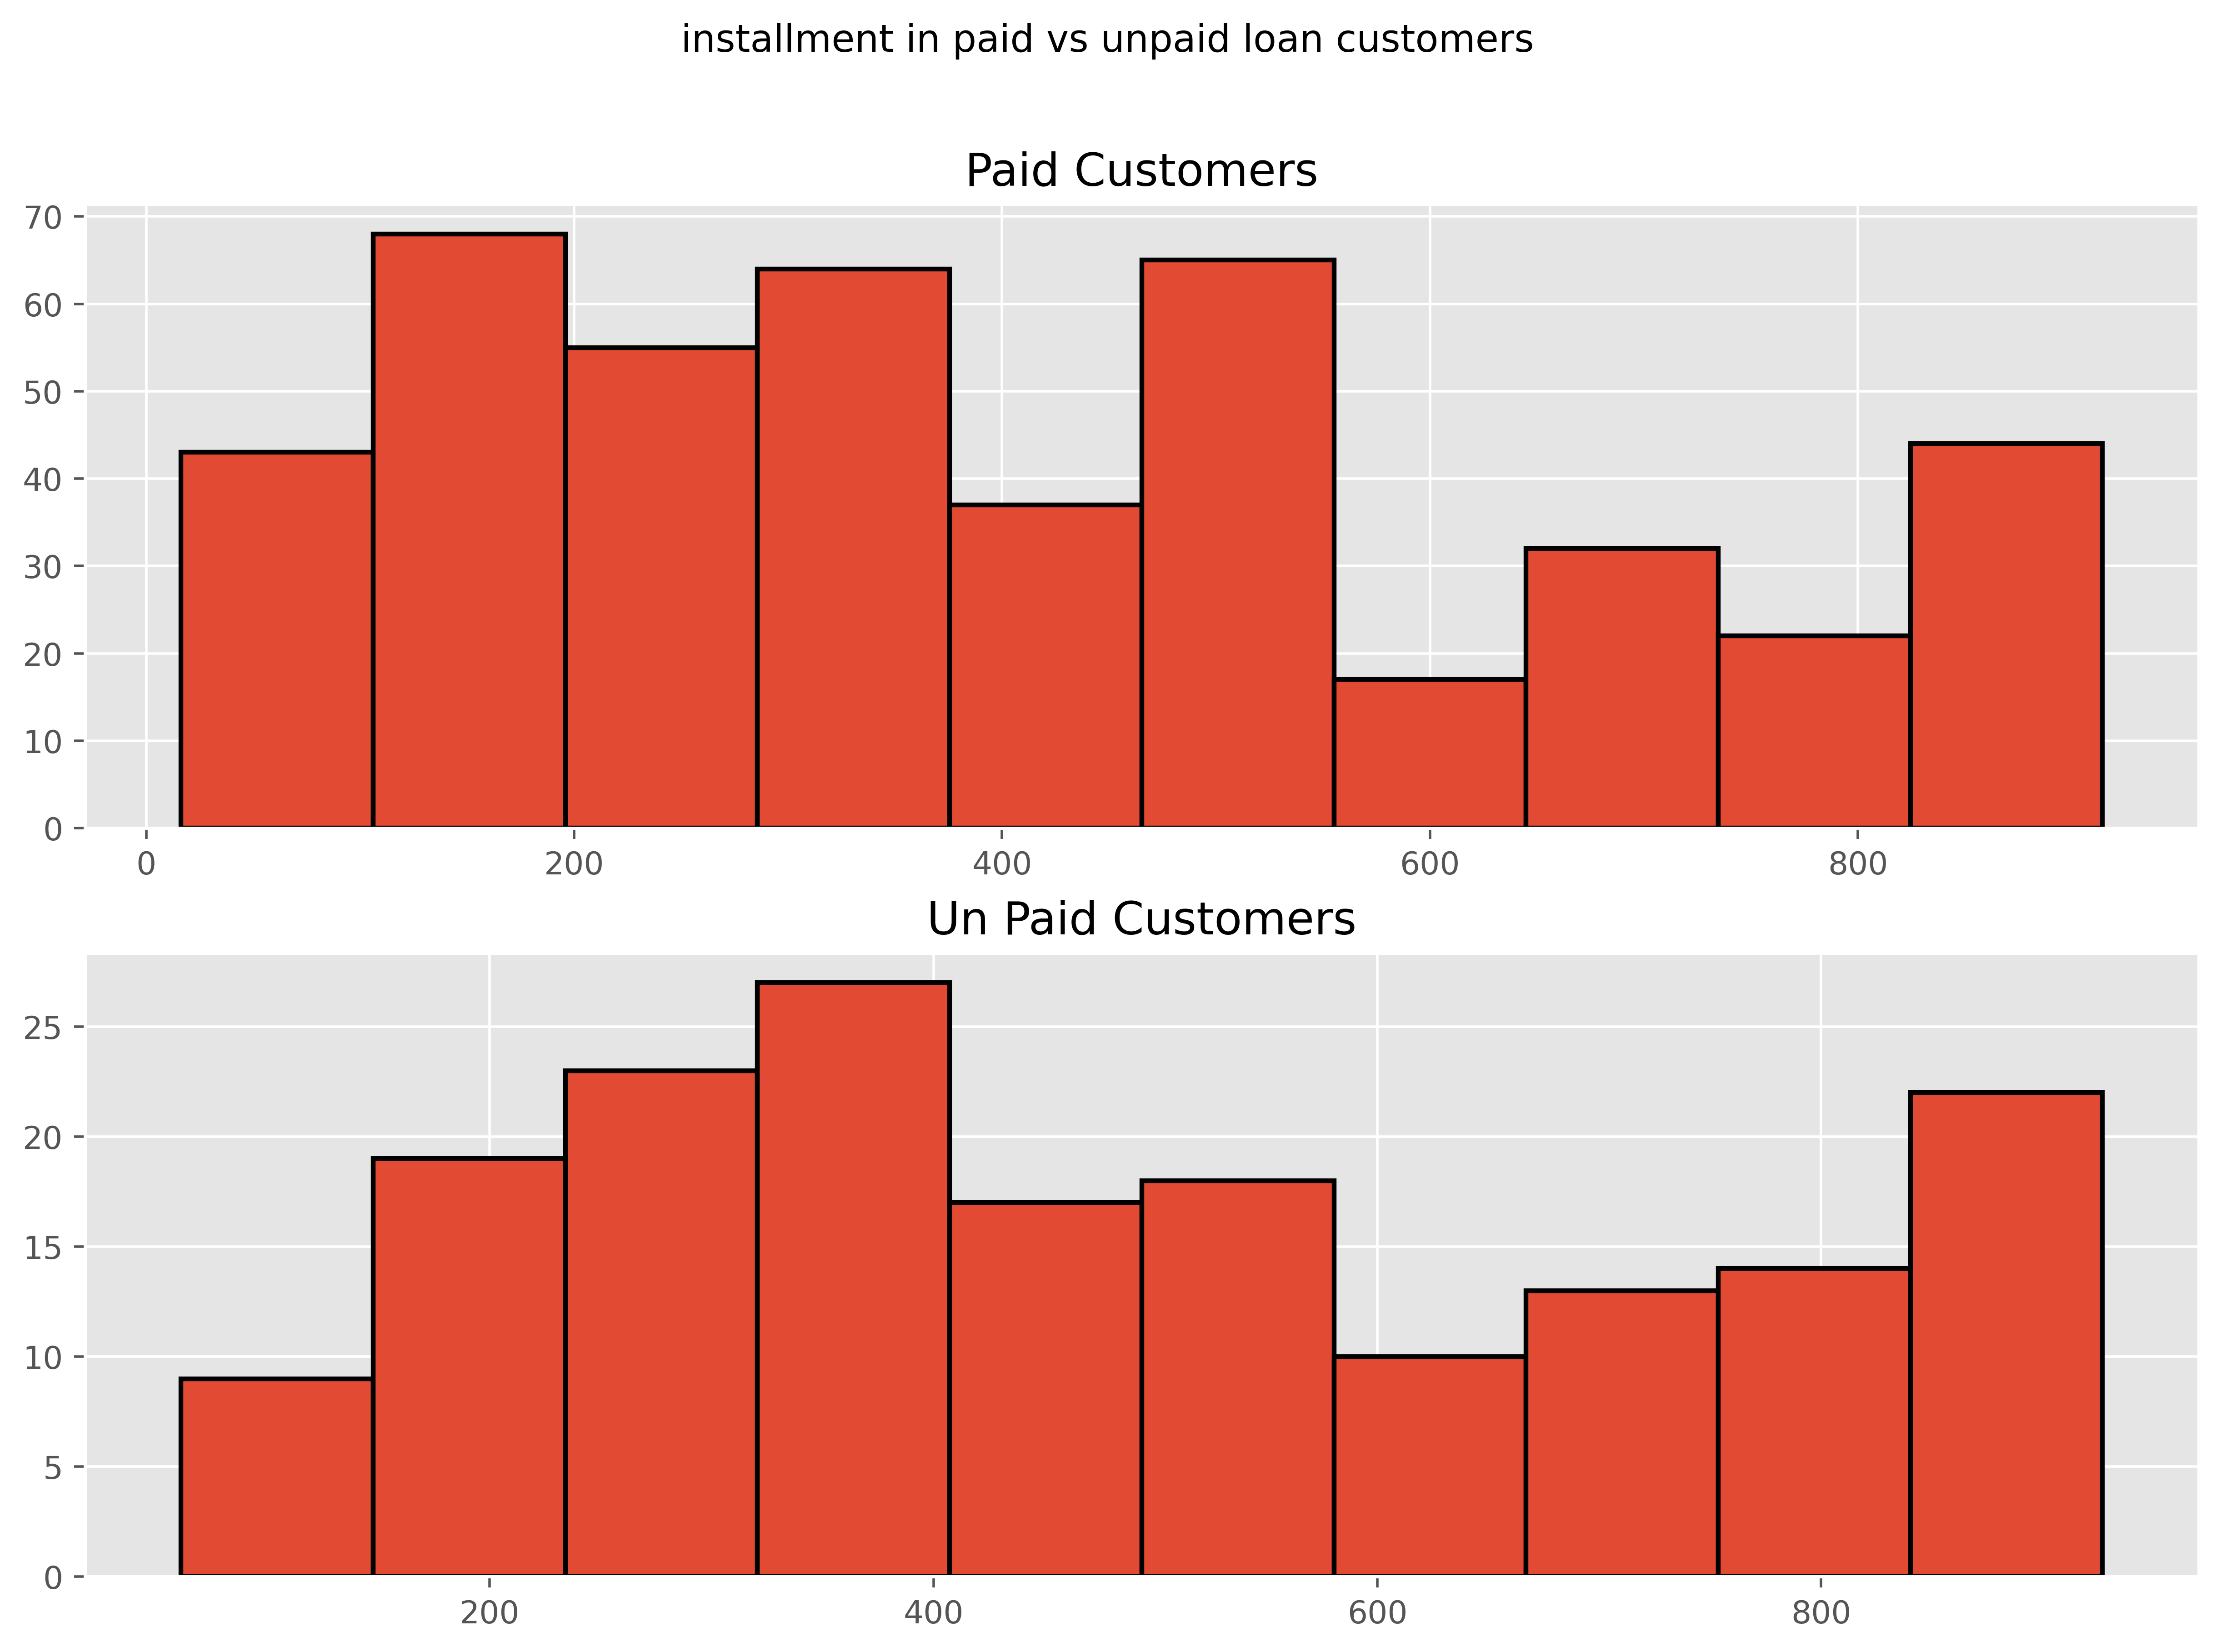

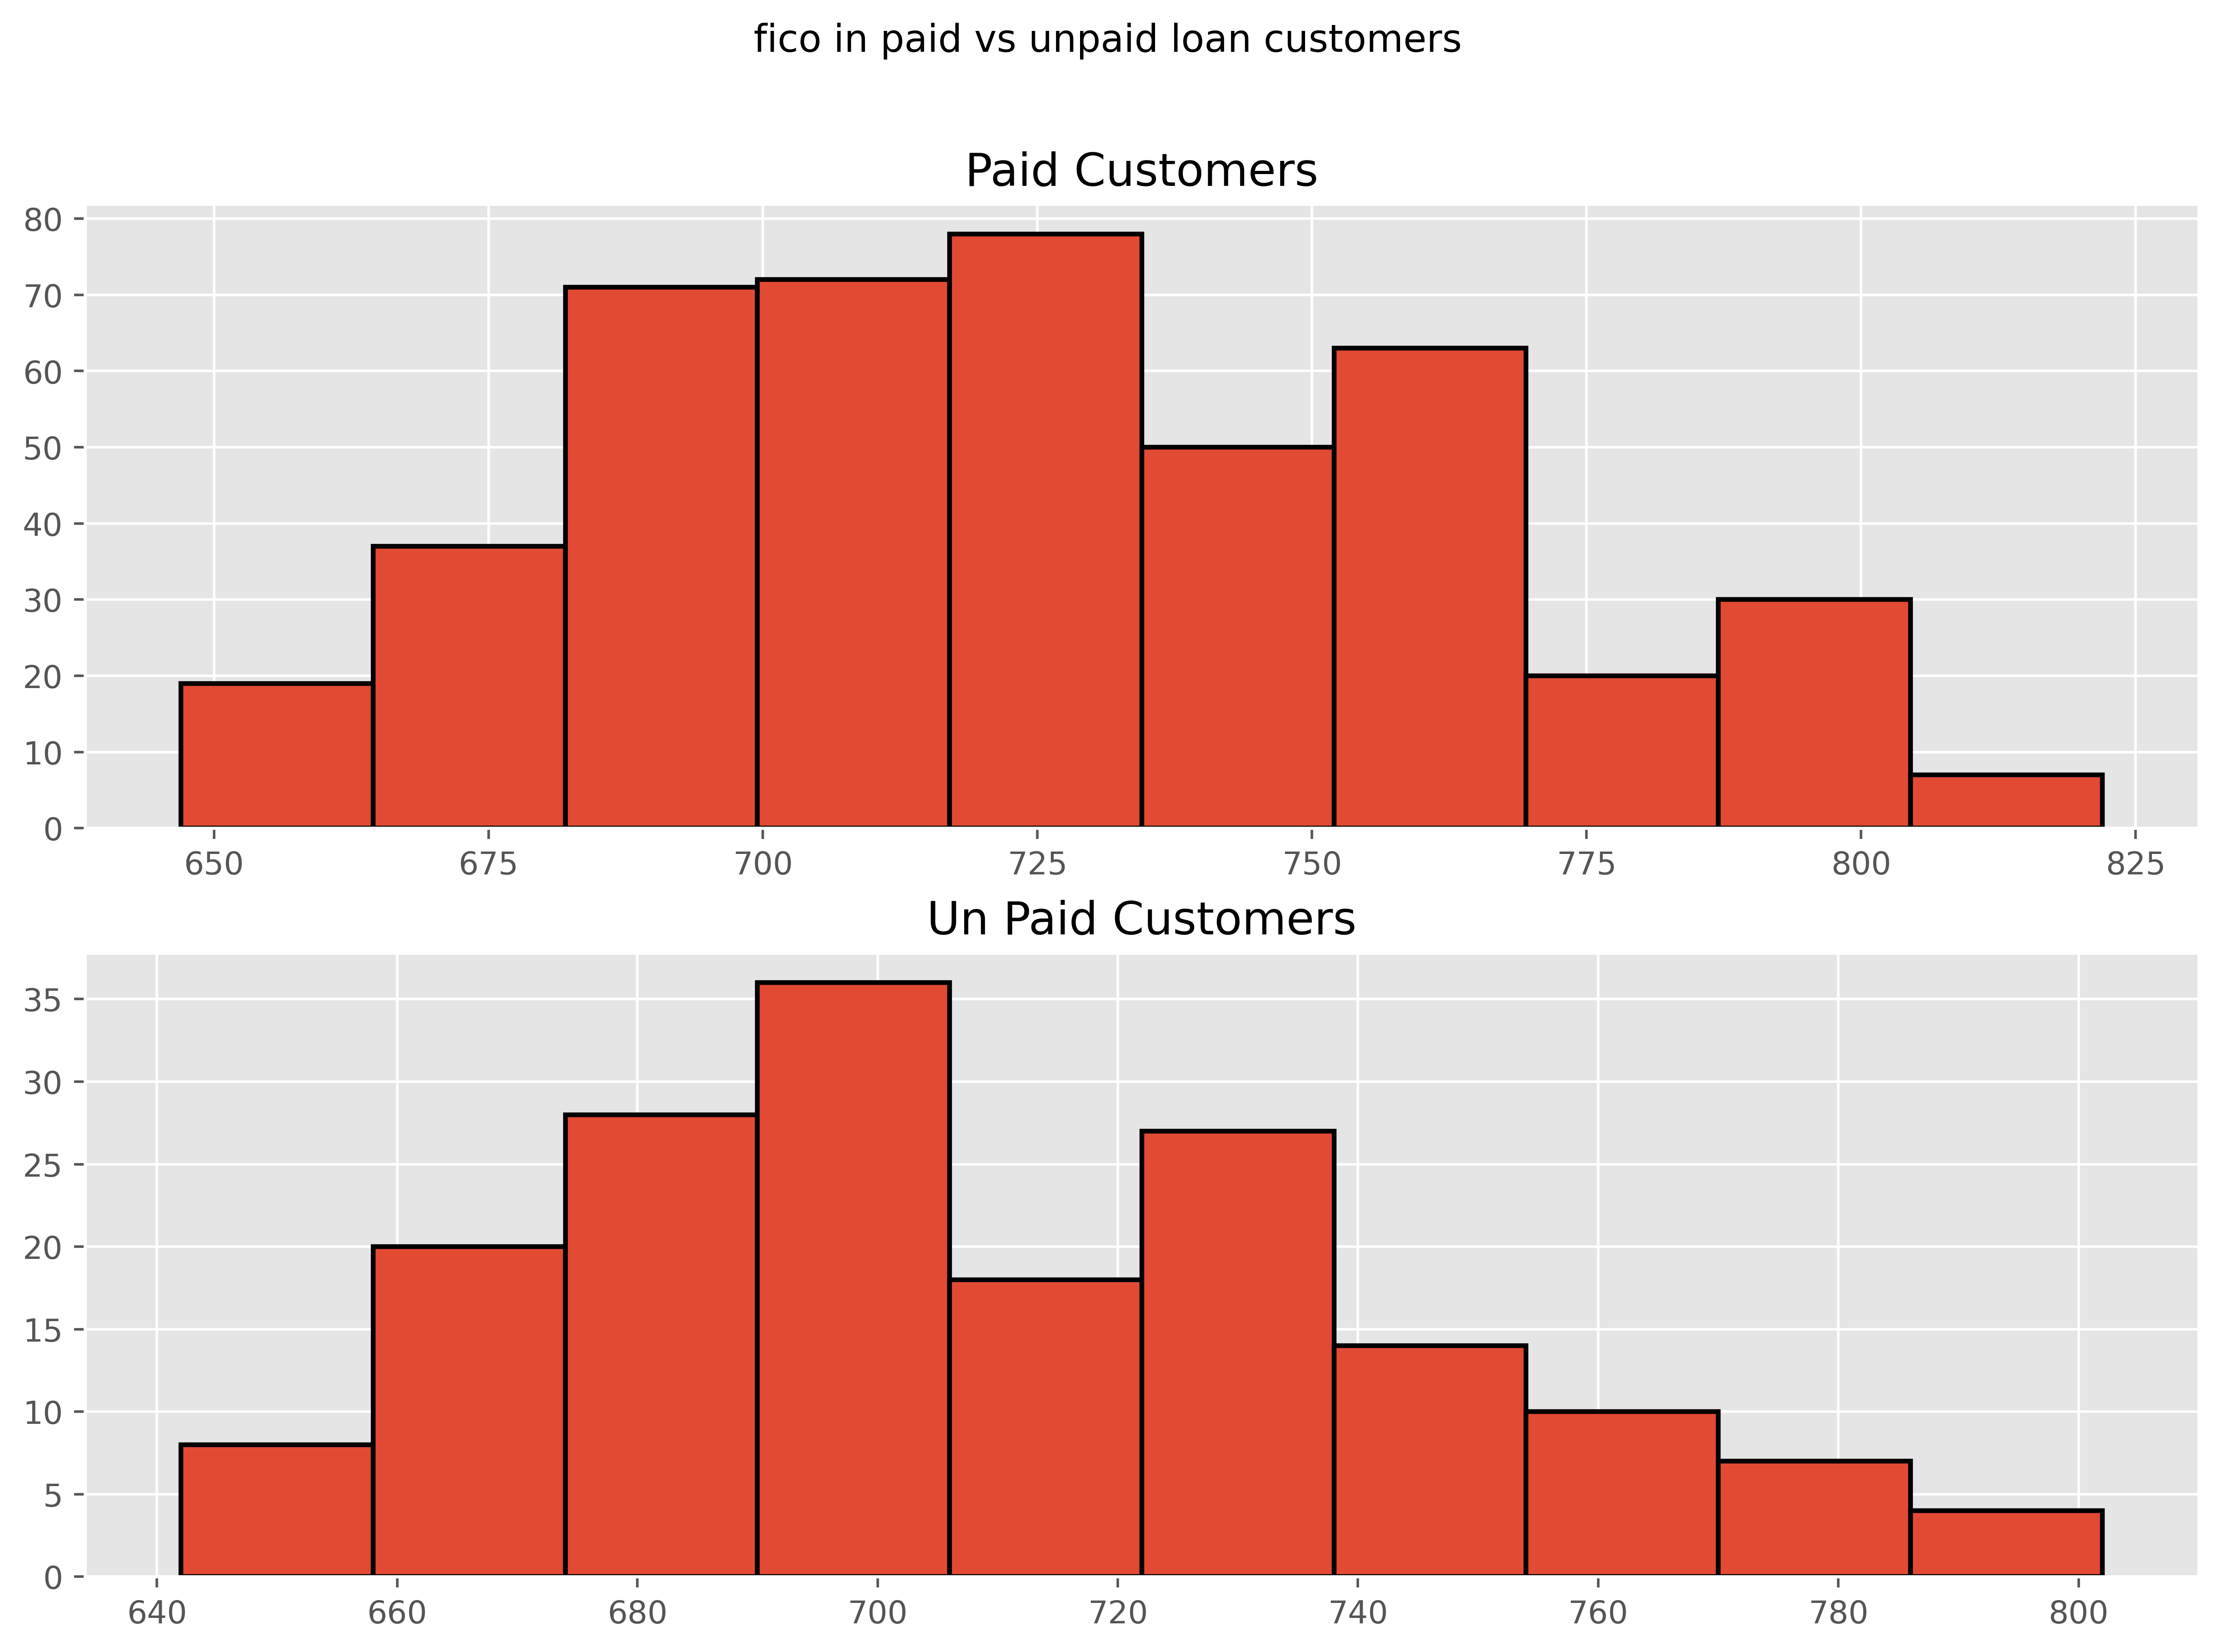

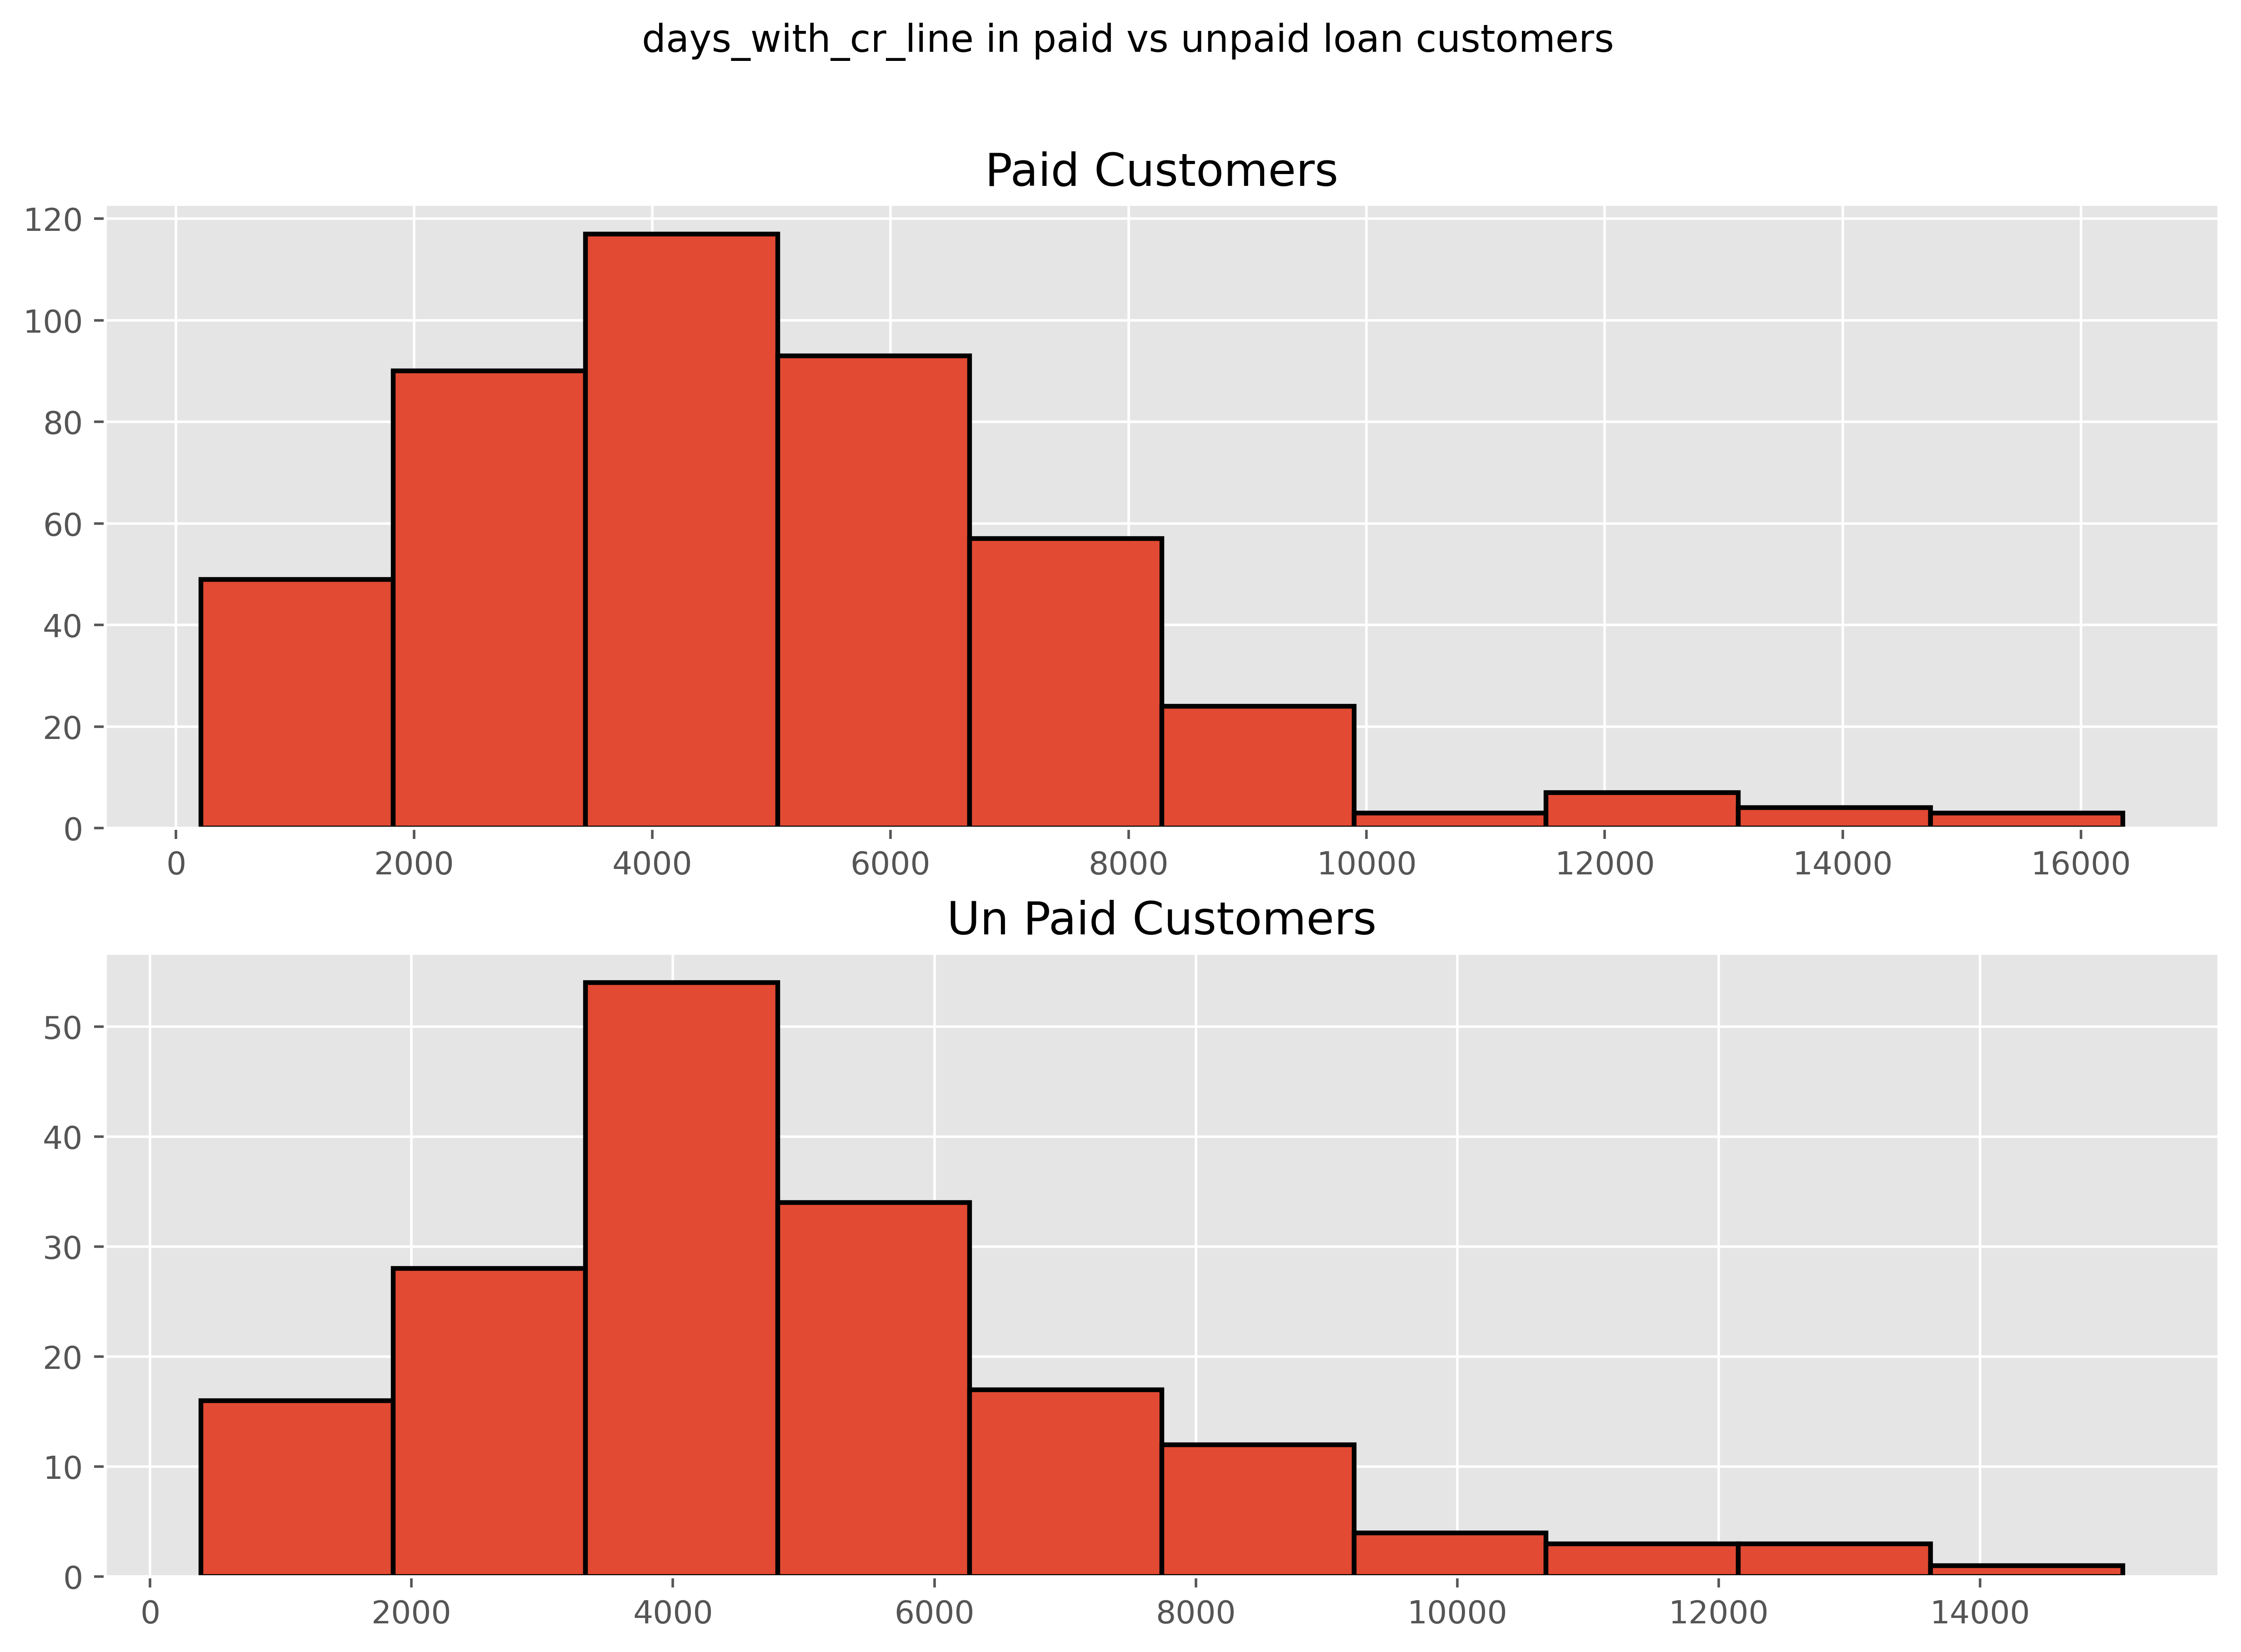

In [95]:
top_four = ['inq_last_6mths', 'int_rate', 'installment', 'fico', 'days_with_cr_line']

for var in top_four:
    fig, ax = plt.subplots(2, figsize=(12,8))
    fig.suptitle(f'{var} in paid vs unpaid loan customers')
    ax[0].hist(paid_small_biz[var], edgecolor='black', lw=1.5)
    ax[0].set_title('Paid Customers')
    ax[1].hist(un_paid_small_biz[var], edgecolor='black', lw=1.5)
    ax[1].set_title('Un Paid Customers')
    plt.savefig(f'../images/{var}_final.png')

In [92]:
paid_customers = df[df['unpaid'] == 0]
un_paid_customers = df[df['unpaid'] == 1]

In [10]:
paid_sample = paid_customers.sample(n=len(un_paid_customers['unpaid']))

In [11]:
paid_sample

credit_policy             purpose  int_rate  installment  \
1413              1           all_other    0.0800       313.37   
5271              1  debt_consolidation    0.0774       241.95   
4691              1  debt_consolidation    0.0894       385.23   
5445              1           all_other    0.0859        56.90   
1660              1    home_improvement    0.1083       326.59   
...             ...                 ...       ...          ...   
7679              1  debt_consolidation    0.1062       325.60   
1612              1    home_improvement    0.1114       656.11   
6407              1           all_other    0.1426       514.59   
2235              1  debt_consolidation    0.1347       395.20   
5902              1  debt_consolidation    0.1635       229.64   

      log_annual_inc    dti  fico  days_with_cr_line  revol_bal  revol_util  \
1413       10.596635   6.48   777        4923.000000      19998        18.3   
5271       10.778956  11.75   787        3421.041667       3415         7.3   
4691       10.645425  22.11   747        3360.000000      19029        22.0   
5445       10.085809   8.95   722        1860.000000       1620        17.1   
1660       11.002100   2.88   762        3450.041667       3123        10.4   
...              ...    ...   ...                ...        ...         ...   
7679       11.114610   6.13   722        4200.041667      10075        73.0   
1612       11.695247   2.82   727        6690.041667      13417        31.3   
6407       11.512925   1.09   687        2940.000000       3098        72.0   
2235       10.968129  13.28   692        3210.041667      22195        45.7   
5902       11.082143  11.41   672        2970.041667       7453        95.6   

      inq_last_6mths  delinq_2yrs  pub_rec  unpaid  
1413               1            0        0       0  
5271               2            0        0       0  
4691               3            0        0       0  
5445               0            0        0       0  
1660               0            0        0       0  
...              ...          ...      ...     ...  
7679               1            0        0       0  
1612               1            1        0       0  
6407               0            0        0       0  
2235               1            0        0       0  
5902               0            0        1       0  

[1533 rows x 14 columns]

In [12]:
un_paid_customers

credit_policy             purpose  int_rate  installment  \
6                 1  debt_consolidation    0.1496       194.02   
7                 1           all_other    0.1114       131.22   
57                1         credit_card    0.1343       678.08   
65                1           all_other    0.1059        32.55   
73                1      small_business    0.1501       225.37   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log_annual_inc    dti  fico  days_with_cr_line  revol_bal  revol_util  \
6          10.714418   4.00   667        3180.041667       3839        76.8   
7          11.002100  11.08   722        5116.000000      24220        68.6   
57         11.884489  10.15   682        4209.958333      41674        74.1   
65         10.433822  14.47   687        1110.000000       4485        36.9   
73         12.269047   6.45   677        6240.000000      56411        75.3   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq_last_6mths  delinq_2yrs  pub_rec  unpaid  
6                  0            0        1       1  
7                  0            0        0       1  
57                 0            0        0       1  
65                 1            0        0       1  
73                 0            0        0       1  
...              ...          ...      ...     ...  
9573               2            0        0       1  
9574               5            0        0       1  
9575               8            0        0       1  
9576               5            0        0       1  
9577               6            0        0       1  

[1533 rows x 14 columns]

In [13]:
len(un_paid_customers['unpaid'])

1533

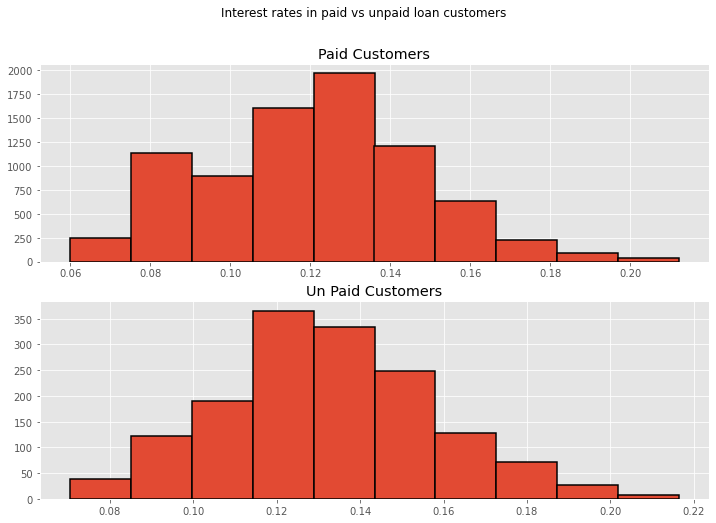

In [14]:
fig, ax = plt.subplots(2, figsize=(12,8))
fig.suptitle('Interest rates in paid vs unpaid loan customers')
ax[0].hist(paid_customers['int_rate'], edgecolor='black', lw=1.5)
ax[0].set_title('Paid Customers')
ax[1].hist(un_paid_customers['int_rate'], edgecolor='black', lw=1.5)
ax[1].set_title('Un Paid Customers');

Text(0, 0.5, 'Count')

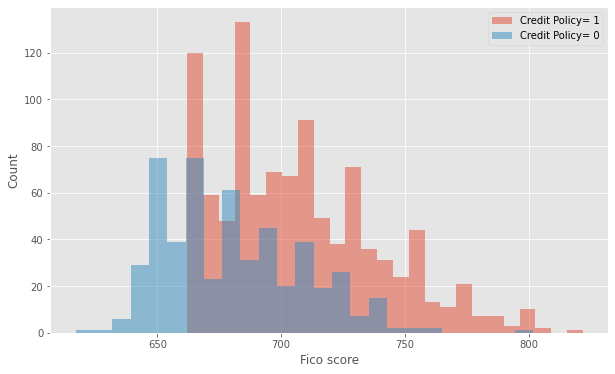

In [15]:
plt.figure(figsize=(10,6))
un_paid_customers[un_paid_customers['credit_policy']==1]['fico'].hist(alpha=0.5,
                                              bins=25,label='Credit Policy= 1')
un_paid_customers[un_paid_customers['credit_policy']==0]['fico'].hist(alpha=0.5,
                                              bins=25,label='Credit Policy= 0')
plt.legend()
plt.xlabel('Fico score')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

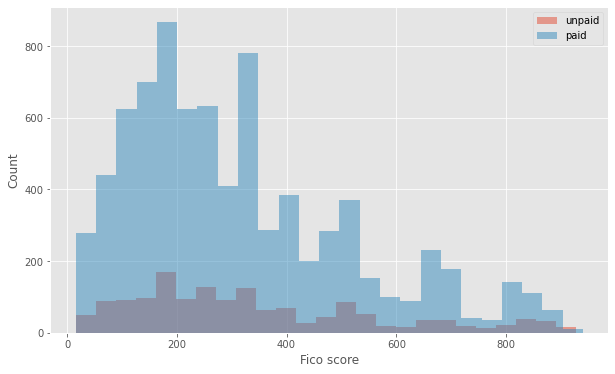

In [16]:
plt.figure(figsize=(10,6))
un_paid_customers['installment'].hist(alpha=0.5,
                                              bins=25,label='unpaid')
paid_customers['installment'].hist(alpha=0.5,
                                              bins=25,label='paid')
plt.legend()
plt.xlabel('Fico score')
plt.ylabel('Count')

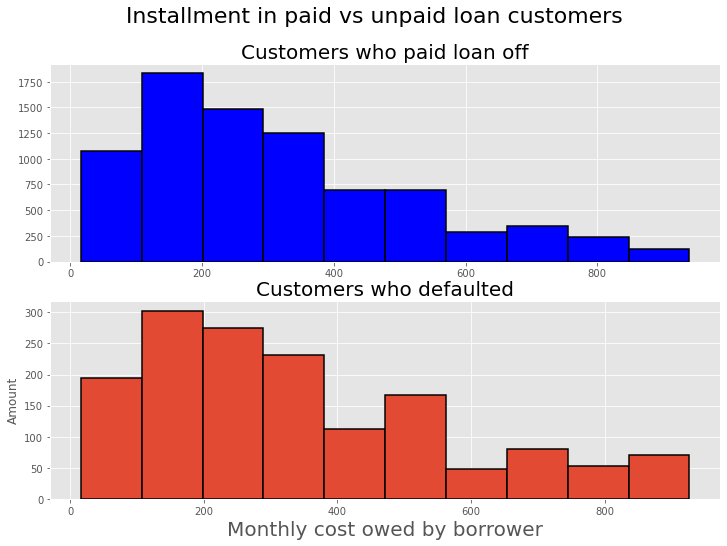

In [17]:
fig, ax = plt.subplots(2, figsize=(12,8))
fig.suptitle('Installment in paid vs unpaid loan customers', size=22)
plt.xlabel('Monthly cost owed by borrower', size=20)
plt.ylabel('Amount')
ax[0].hist(paid_customers['installment'], edgecolor='black', lw=1.5, color='b')
ax[0].set_title('Customers who paid loan off', size=20)
ax[1].hist(un_paid_customers['installment'], edgecolor='black', lw=1.5)
ax[1].set_title('Customers who defaulted', size=20)
plt.savefig('../images/installment.png')

In [18]:
cols = df['purpose'].tolist()
cols = [col.replace('_', ' ') for col in cols]
df['purpose'] = cols

In [19]:
test = df[['purpose', 'unpaid']].where(df.unpaid == 1) 
test = test.dropna()



In [20]:
df['purpose']

0       debt consolidation
1              credit card
2       debt consolidation
3       debt consolidation
4              credit card
               ...        
9573             all other
9574             all other
9575    debt consolidation
9576      home improvement
9577    debt consolidation
Name: purpose, Length: 9578, dtype: object

In [21]:
d = {}
d2 = {}
for val in df['purpose']:
    if val in d:
        d[val] += 1
    else:
        d[val] = 1
dict(sorted(d.items(), key=lambda item: item[1]))
d

{'debt consolidation': 3957,
 'credit card': 1262,
 'all other': 2331,
 'home improvement': 629,
 'small business': 619,
 'major purchase': 437,
 'educational': 343}

In [22]:
for val_ in test['purpose']:
    if val_ in d2:
        d2[val_] += 1
    else:
        d2[val_] = 1
        
dict(sorted(d2.items(), key=lambda item: item[1]))
d2

cheat_dict = {'debt consolidation': .30477,
 'credit card': .2313,
 'all other': .3320,
 'home improvement': .3402,
 'small business': .5557,
 'major purchase': .2242,
 'educational': .4023}

cheat_dict = dict(sorted(cheat_dict.items(), key=lambda item: item[1], reverse=True))

In [23]:
d3 = dict((k, float(d[k]) / d2[k]) for k in d2)
d3

{'debt consolidation': 6.562189054726368,
 'all other': 6.023255813953488,
 'credit card': 8.643835616438356,
 'small business': 3.5988372093023258,
 'home improvement': 5.878504672897196,
 'educational': 4.971014492753623,
 'major purchase': 8.918367346938776}

In [77]:
df

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

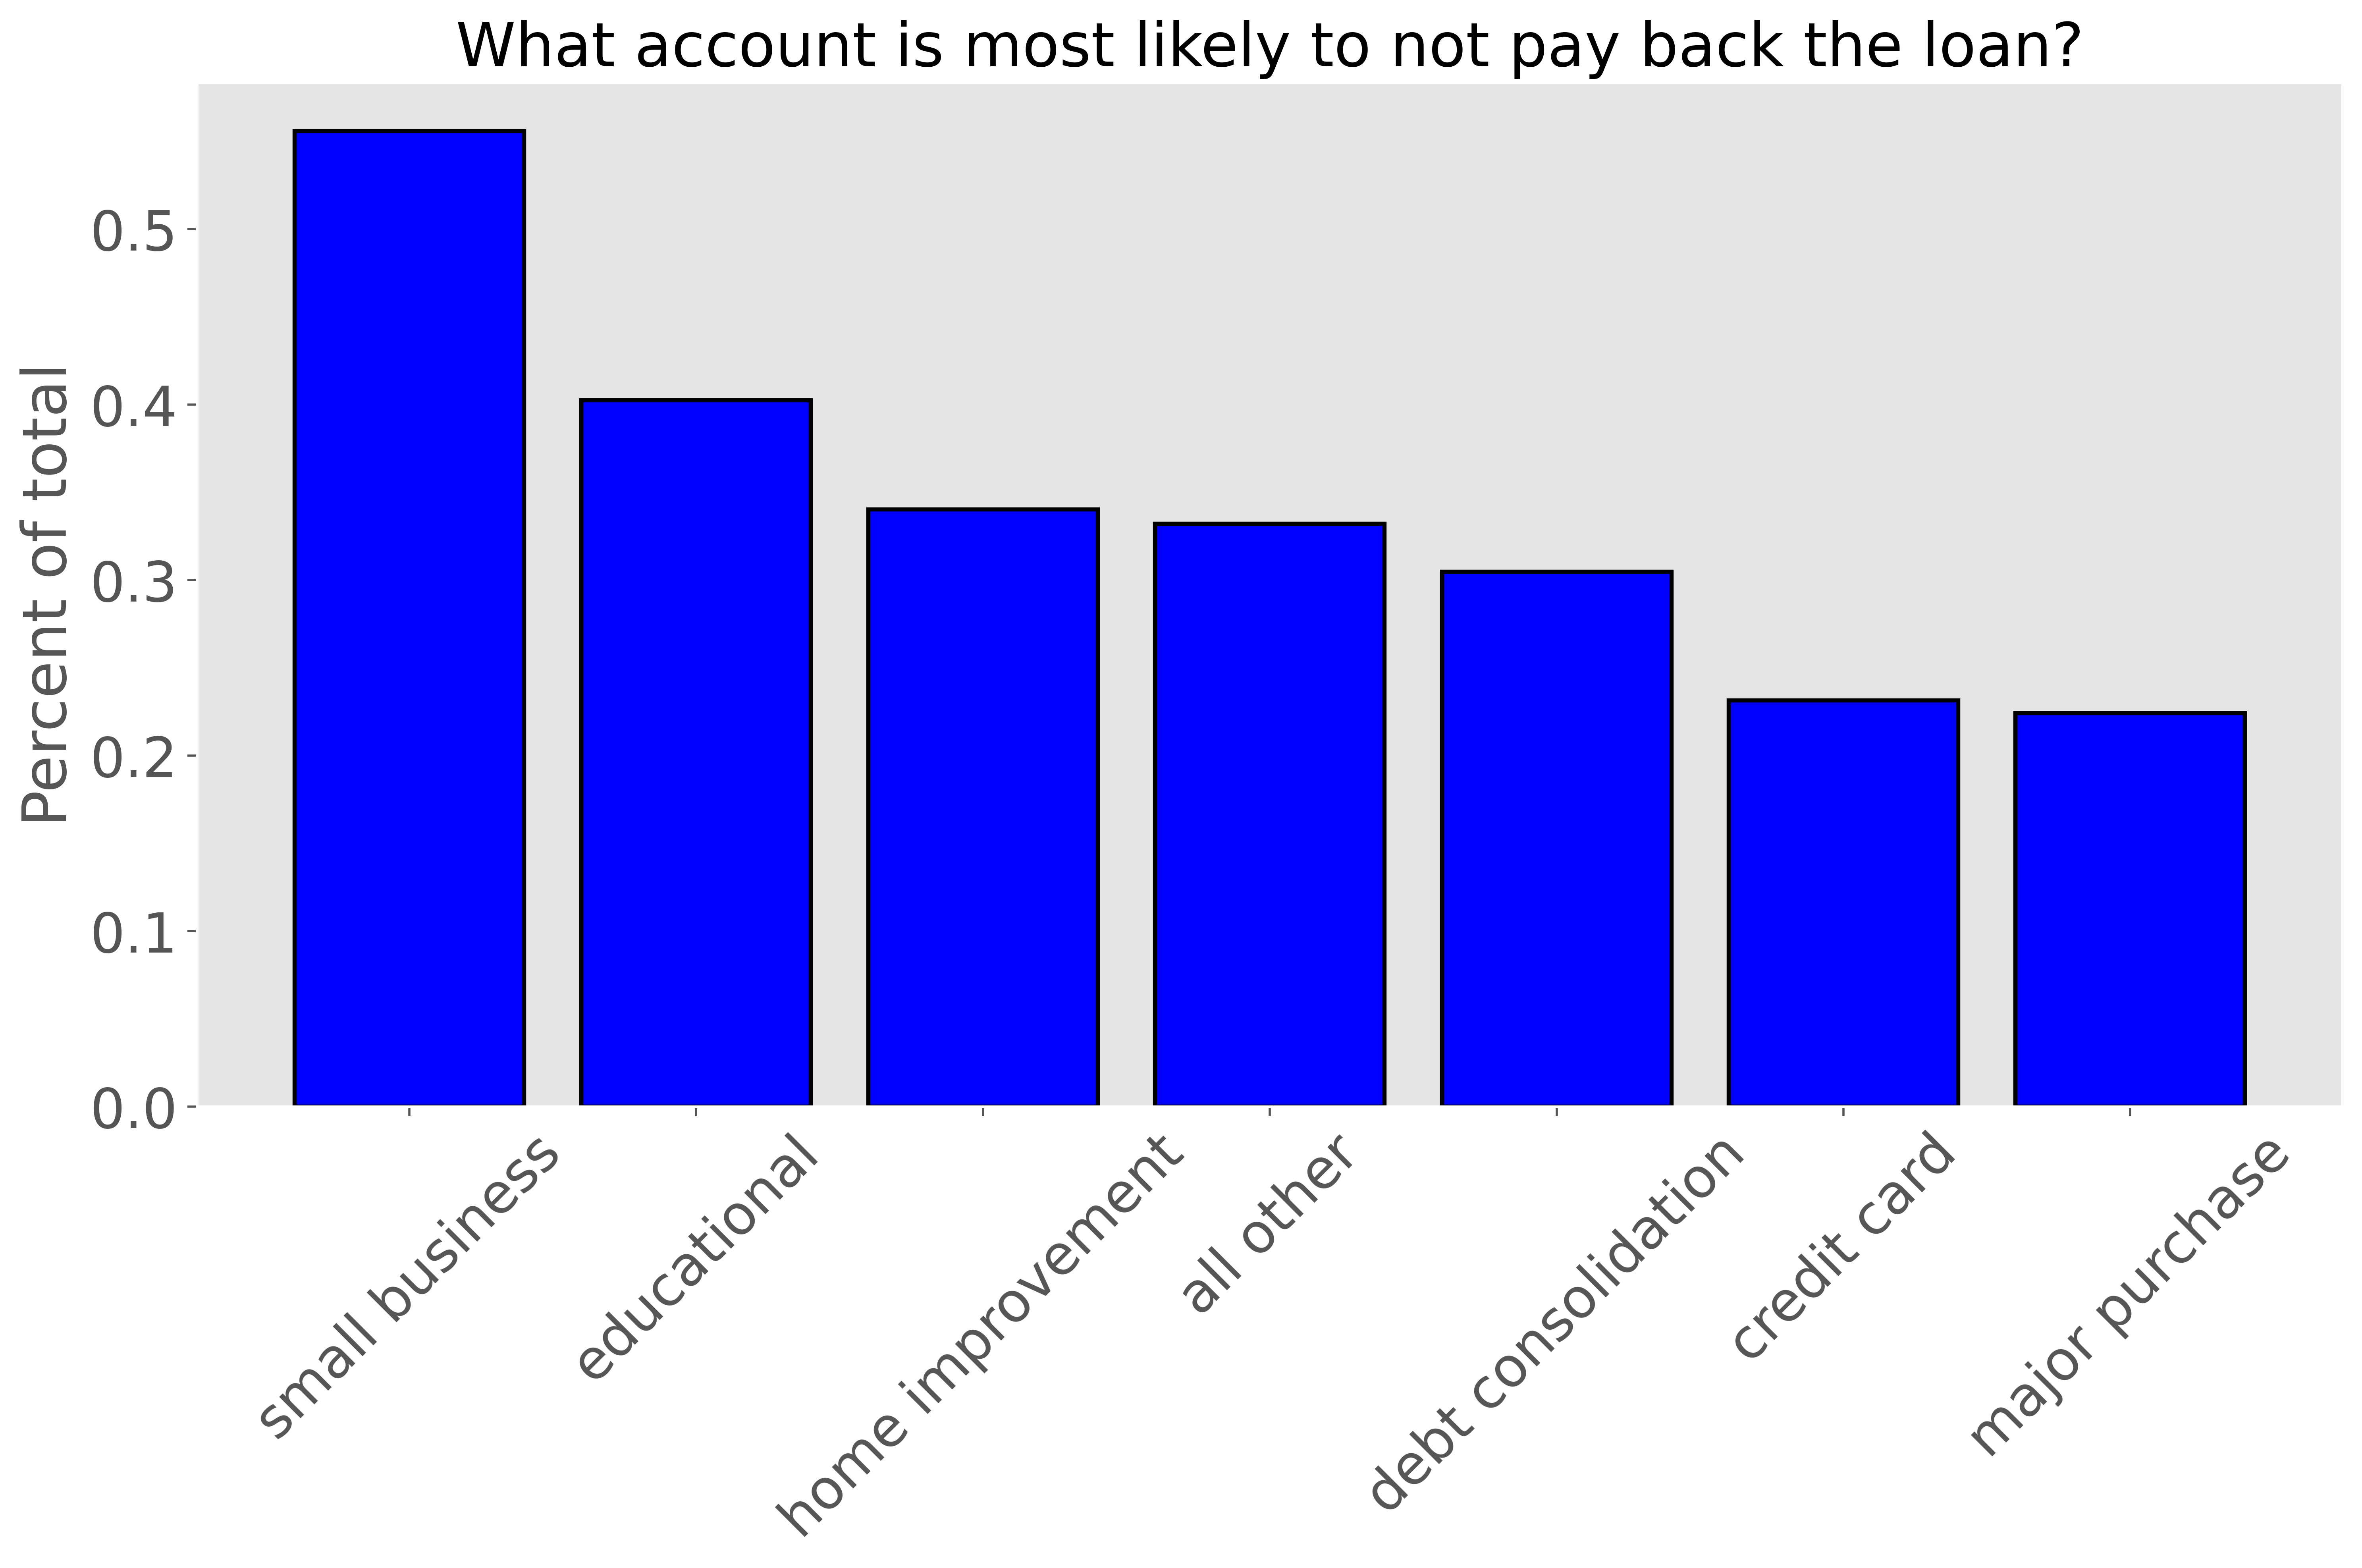

In [76]:
plt.figure(figsize=(12,8))
#sns.countplot(x='purpose',hue='unpaid',data=df, edgecolor='black', lw=1.5);
plt.bar(list(cheat_dict.keys()), cheat_dict.values(), color='b', edgecolor='black', lw=1.5)
plt.title('What account is most likely to not pay back the loan?', size=22)
# plt.xlabel('Purpose',size=22)
plt.ylabel('Percent of total', size=22)
plt.xticks(size=20, rotation=45)
plt.yticks(size=20)
plt.tight_layout()
plt.annotate

plt.grid(b=None)
# plt.legend(prop={'size':20})
plt.savefig('../images/most_likely_dpi.png')


In [51]:
un_paid_customers['purpose']
paid_customers['purpose']

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9561             all_other
9562    debt_consolidation
9564             all_other
9567             all_other
9568             all_other
Name: purpose, Length: 8045, dtype: object

Text(0.5, 1.0, 'What account is most likely to not pay back the loan?')

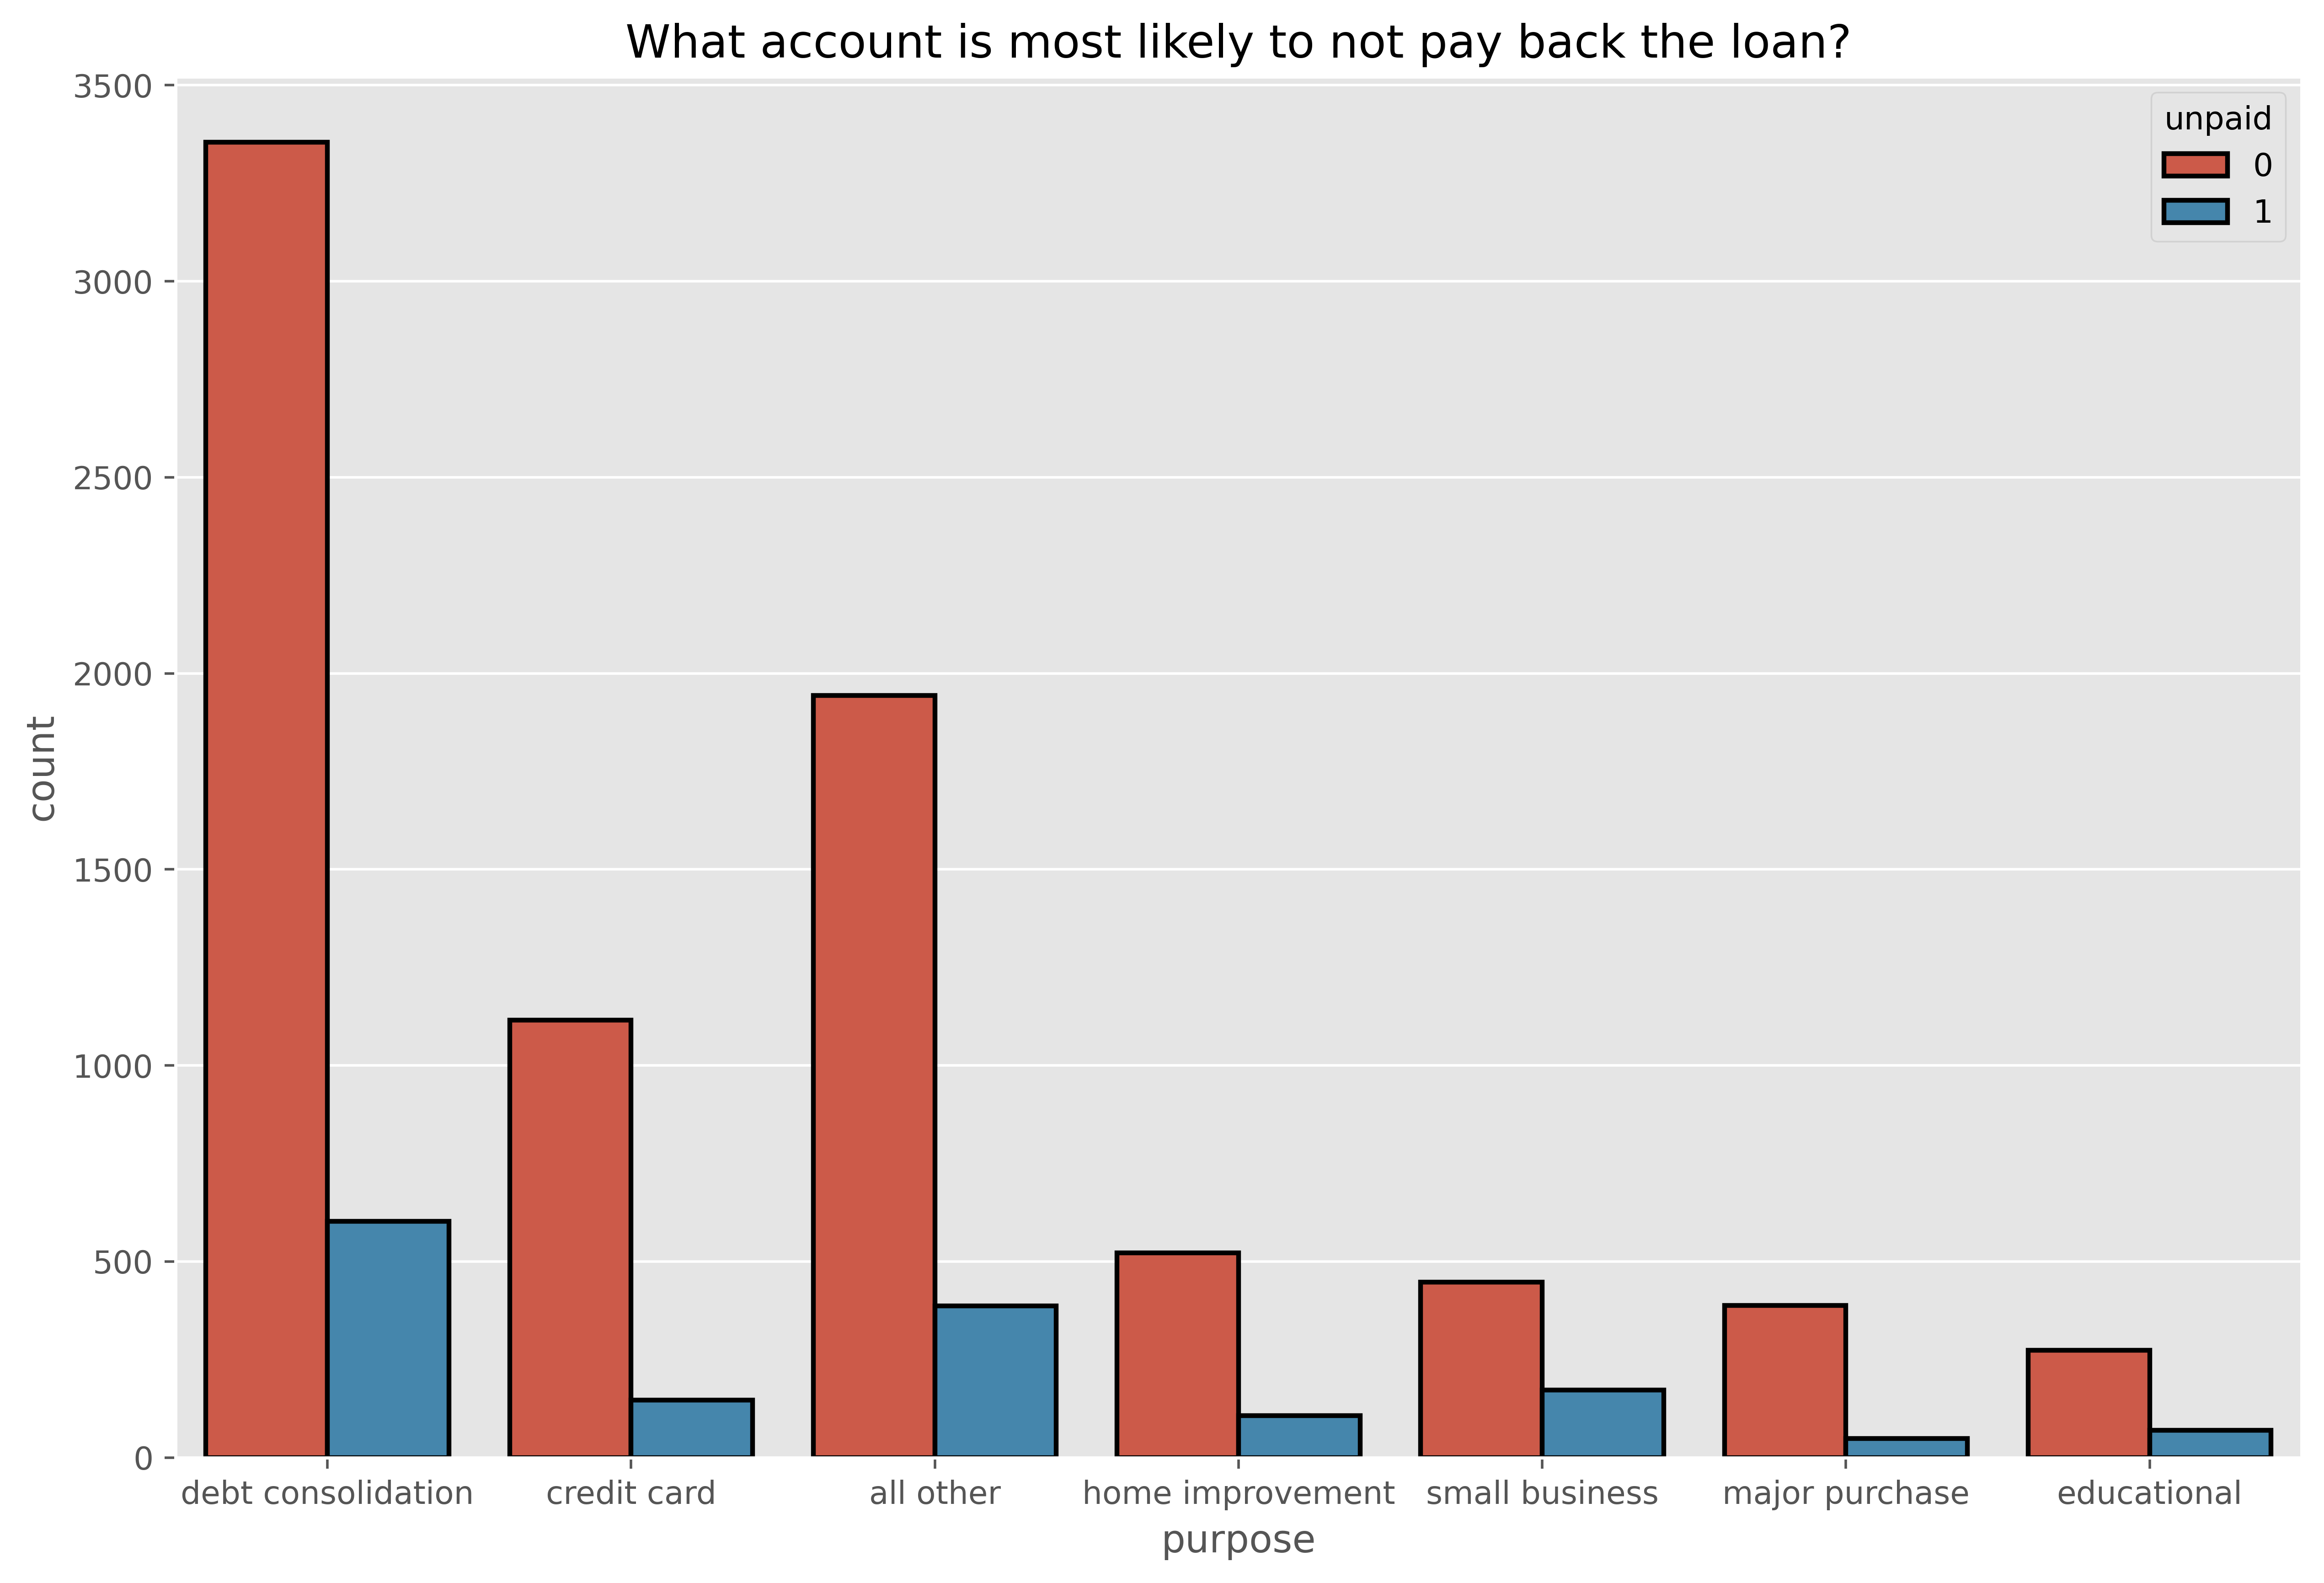

In [52]:
plt.figure(figsize=(12,8))
sns.countplot(x='purpose',hue='unpaid',data=df, edgecolor='black', lw=1.5);
plt.title('What account is most likely to not pay back the loan?')
# plt.savefig('../images/most_likely_ratio.png')


Text(0, 0.5, 'Count')

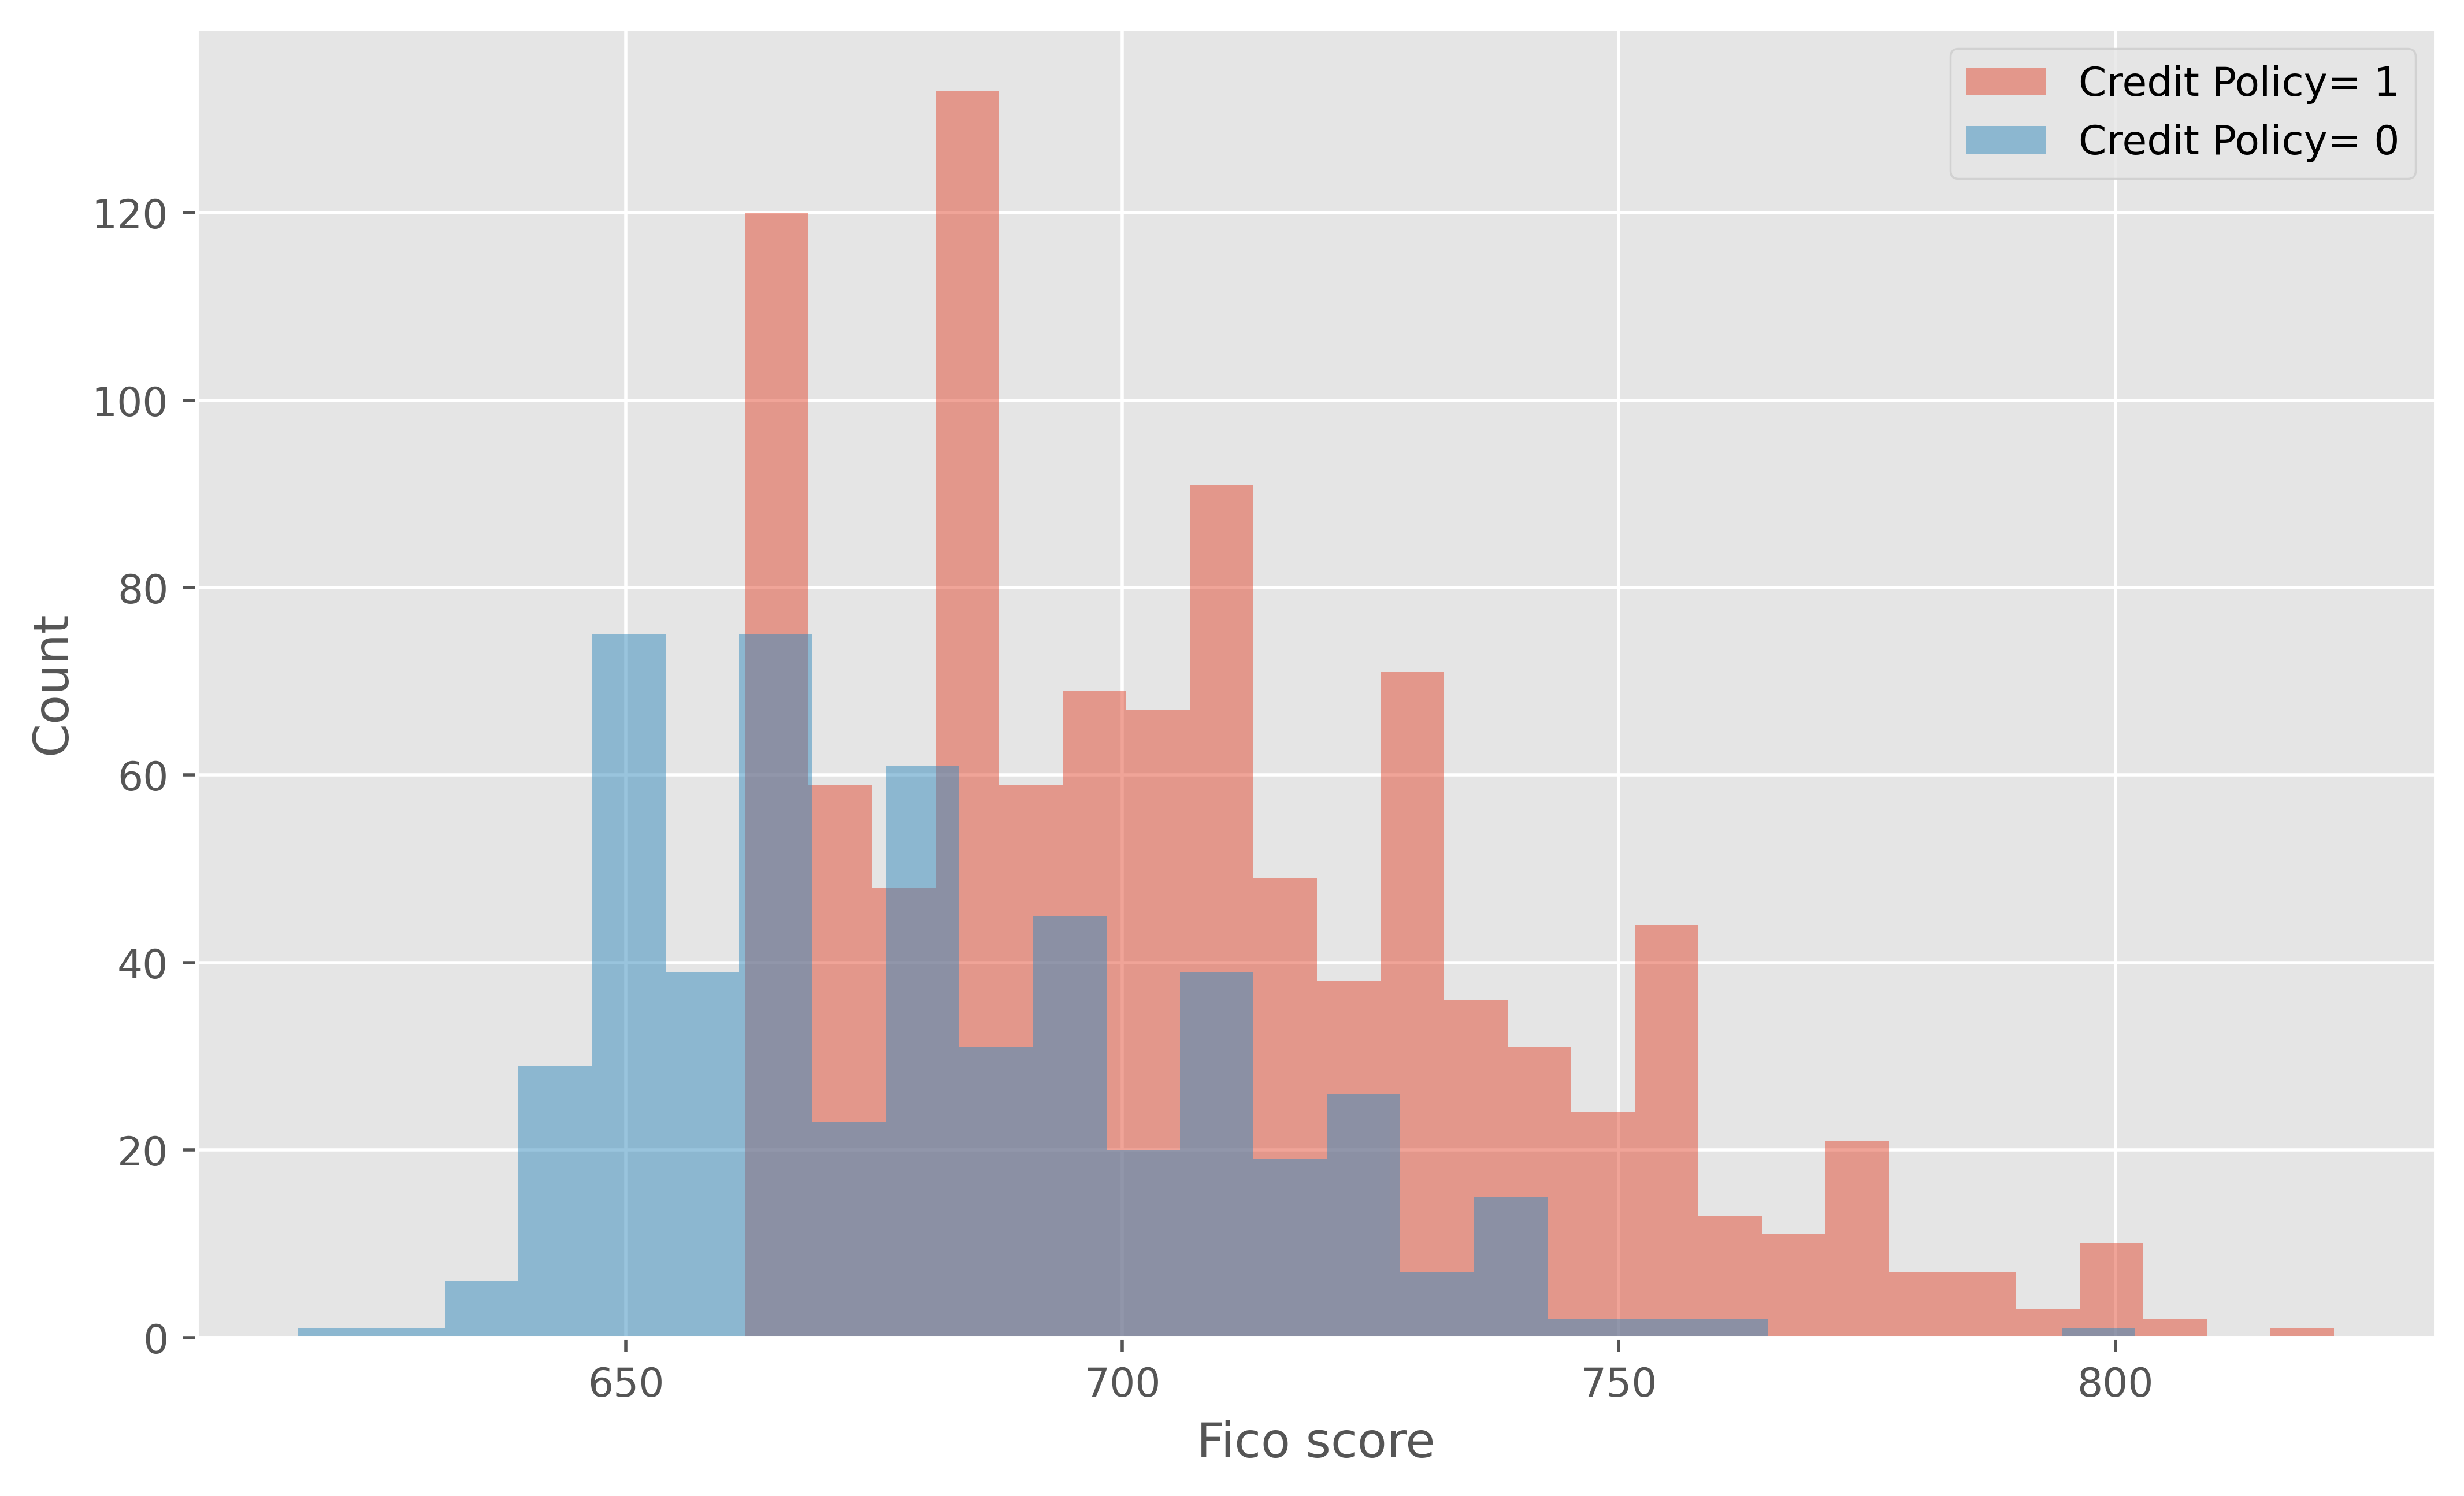

In [53]:
plt.figure(figsize=(10,6))
un_paid_customers[un_paid_customers['credit_policy']==1]['fico'].hist(alpha=0.5,
                                              bins=25,label='Credit Policy= 1')
un_paid_customers[un_paid_customers['credit_policy']==0]['fico'].hist(alpha=0.5,
                                              bins=25,label='Credit Policy= 0')
plt.legend()
plt.xlabel('Fico score')
plt.ylabel('Count')

KeyError: 'debt consolidation'

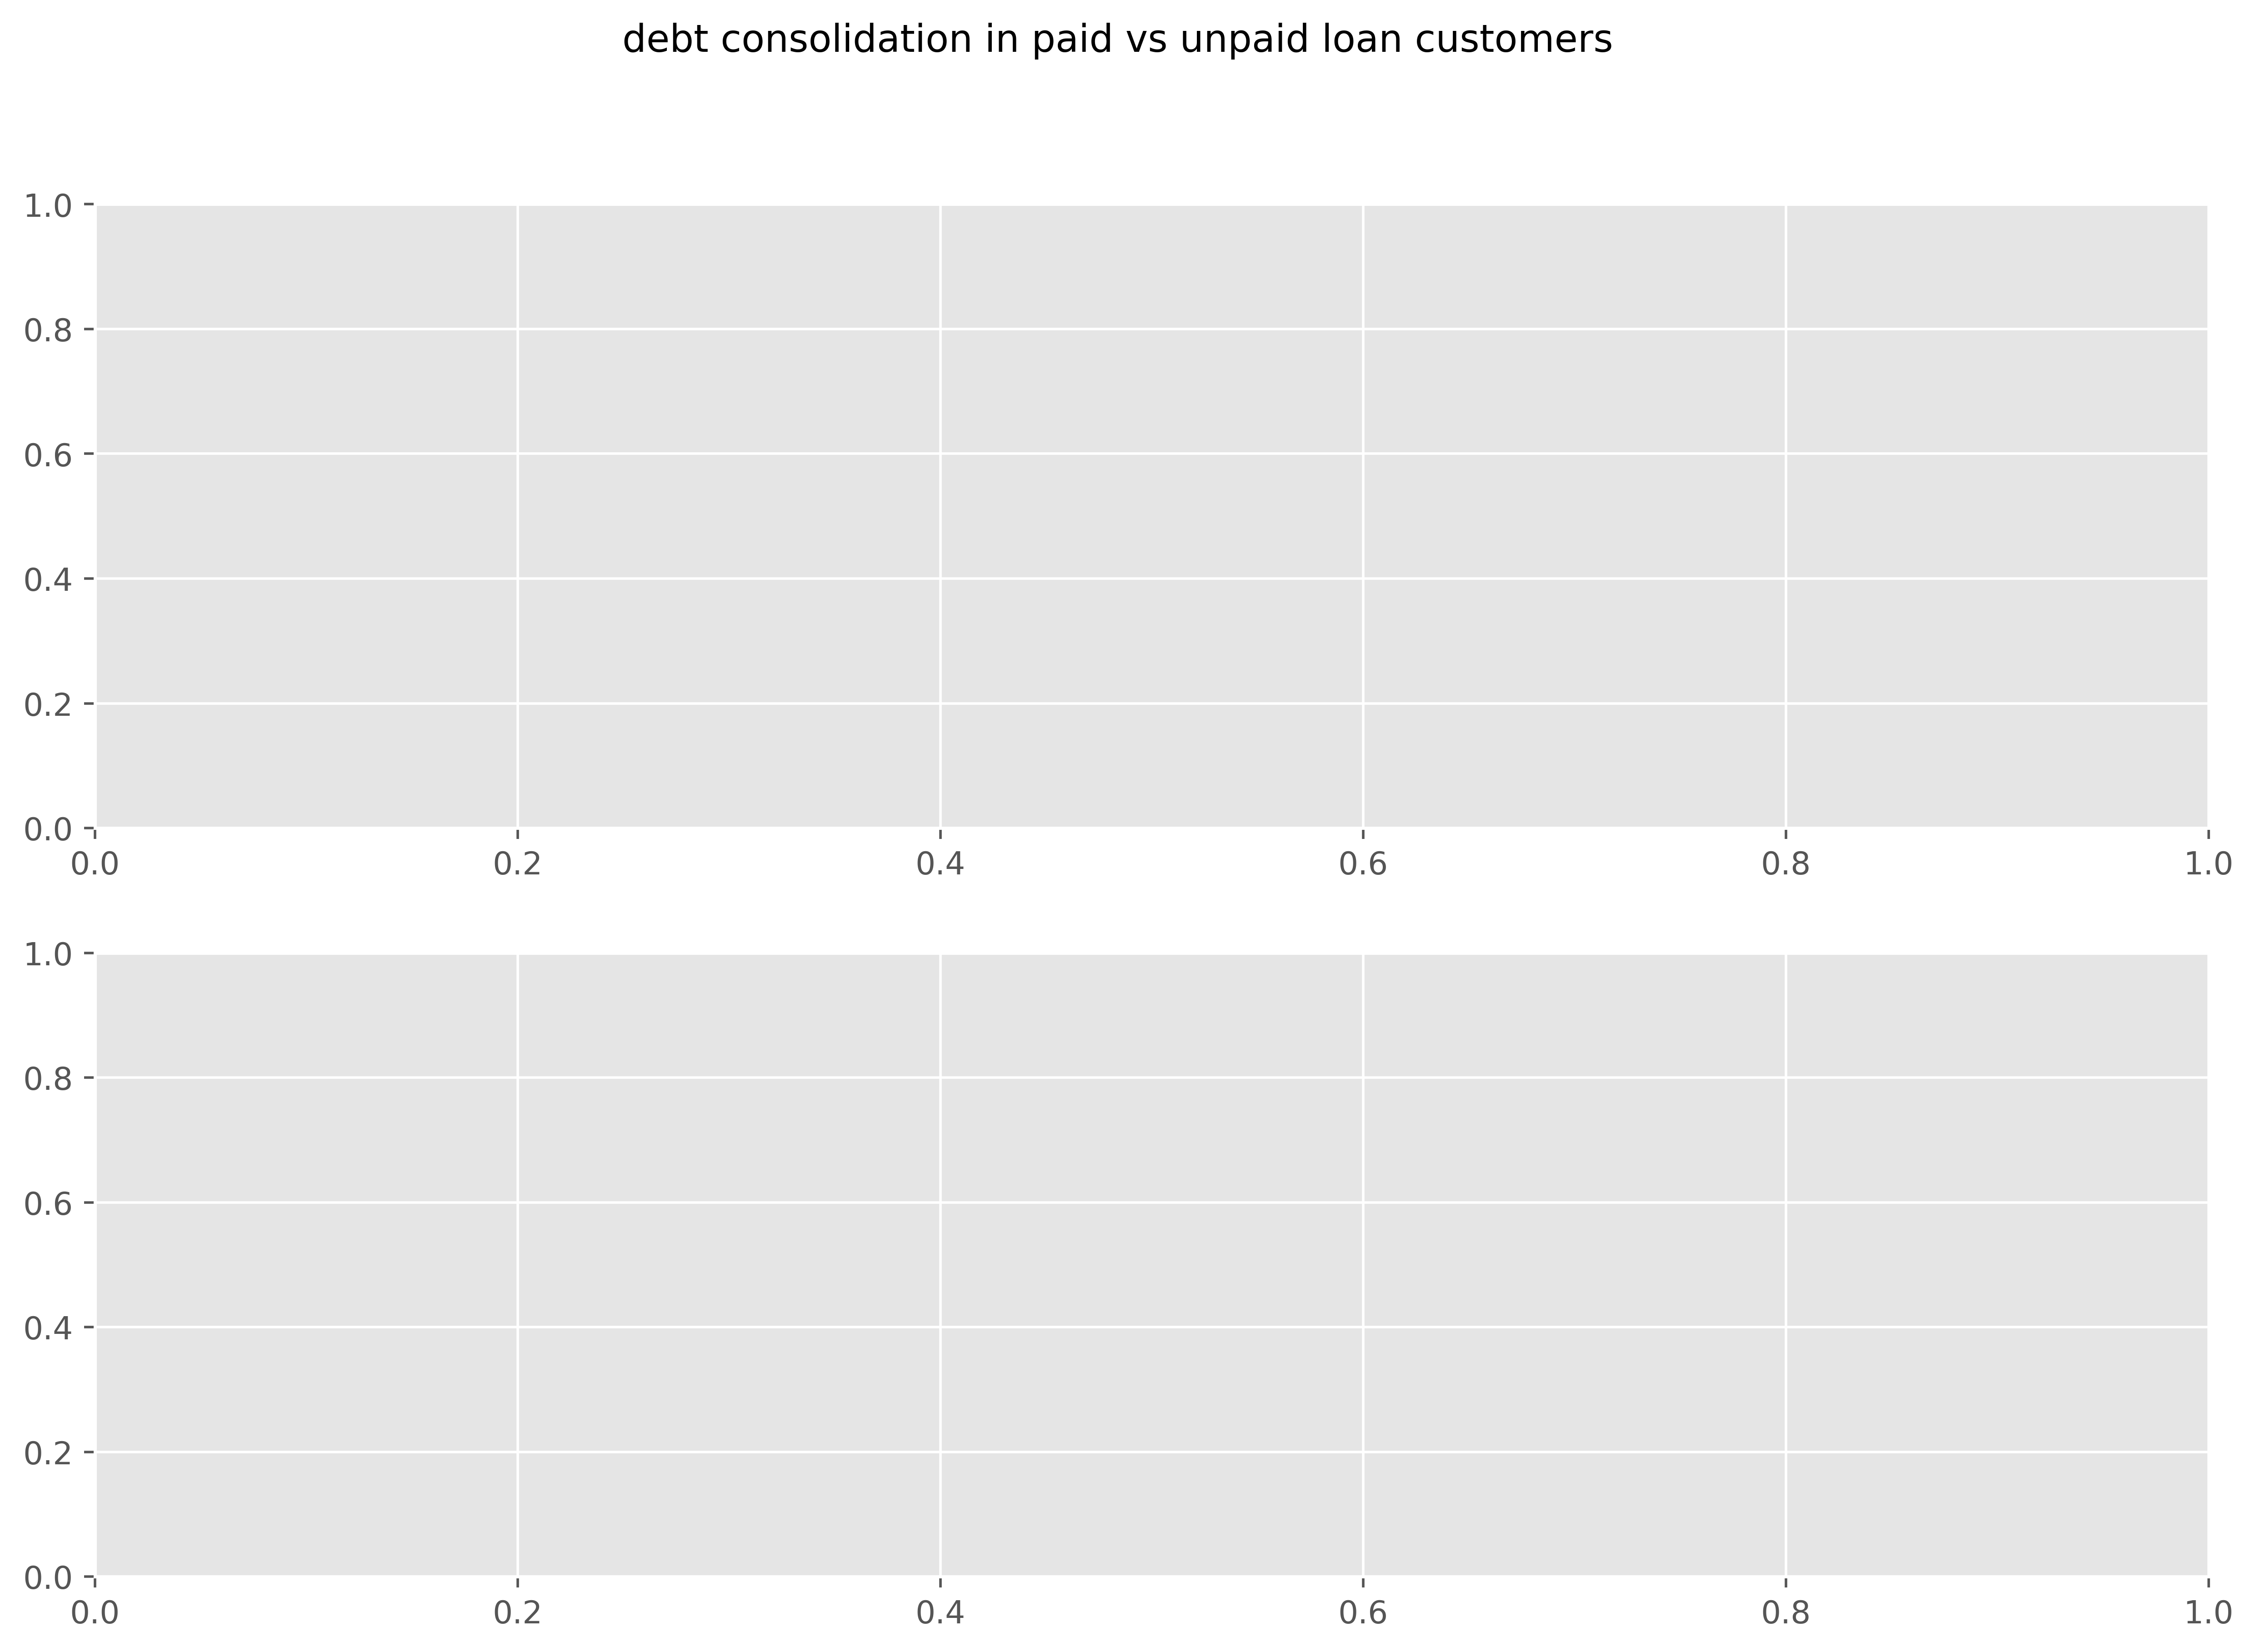

In [54]:
for col in cols:
    fig, ax = plt.subplots(2, figsize=(12,8))
    fig.suptitle(f'{col} in paid vs unpaid loan customers')
    ax[0].hist(paid_customers[col], edgecolor='black', lw=1.5)
    ax[0].set_title('Paid Customers')
    ax[1].hist(un_paid_customers[col], edgecolor='black', lw=1.5)
    ax[1].set_title('Un Paid Customers')

In [55]:
# variables to focus on:
# credit policy
# Purpose (new one hot encoded columns)
# int rate
# installment
# Fico
# Days with credit line
# Revol_util
#
#
# Possibly something in Pub_rec 
# possibly something in Dti
# Not really sure about Log annual income, but I want to include 
#


In [56]:
variable = ['purpose']
df_one_hot = pd.get_dummies(df,columns=variable,drop_first=True)

In [78]:
df_one_hot.head()

credit_policy  int_rate  installment  log_annual_inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days_with_cr_line  revol_bal  revol_util  inq_last_6mths  delinq_2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub_rec  unpaid  purpose_credit card  purpose_debt consolidation  \
0           0       0                    0                           1   
1           0       0                    1                           0   
2           0       0                    0                           1   
3           0       0                    0                           1   
4           0       0                    1                           0   
...       ...     ...                  ...                         ...   
9573        0       1                    0                           0   
9574        0       1                    0                           0   
9575        0       1                    0                           1   
9576        0       1                    0                           0   
9577        0       1                    0                           1   

      purpose_educational  purpose_home improvement  purpose_major purchase  \
0                       0                         0                       0   
1                       0                         0                       0   
2                       0                         0                       0   
3                       0                         0                       0   
4                       0                         0                       0   
...                   ...                       ...                     ...   
9573                    0                         0                       0   
9574                    0                         0                       0   
9575                    0                         0                       0   
9576                    0                         1                       0   
9577                    0                         0                       0   

      purpose_small business  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
9573                       0  
9574                       0  
9575                       0  
9576    

In [58]:
# holdout set, leave aside, dont touch, similuate unseen data
# remaining data (X_train) perform train/test split and pass the new (x_train) into models
# 

In [59]:
# split data, hold out set, covert to csv put folder dont touch
# conduct eda on new "xtrain"
# split train/test "xtrain"
# here, conduct the under sampling (ideally something better) on undersample "**X-train_2**"
# modeling

# class balancing 


In [60]:
X = df_one_hot.drop('unpaid', axis=1)
y = df_one_hot['unpaid']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=3, max_features=2, min_samples_leaf=3, n_estimators=300)
model = RandomForestClassifier()
#model = RandomForestClassifier('random_state'=1, 'n_estimators'= 200, 'min_samples_split'= 8, 'min_samples_leaf'= 10, max_features= log2, 'max_depth'= None, 'bootstrap'= False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Decision Tree Accuracy: 0.8361169102296451
Confusion Matrix: [[1590   42]
 [ 272   12]]
Precision: 0.2222222222222222
Recall: 0.04225352112676056


In [63]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20)
gb_model = GradientBoostingClassifier(learning_rate=0.2, n_estimators=300, random_state=42,
                                        min_samples_leaf=200, max_depth=3, max_features=3)
gb_model.fit(X_train2, y_train2)
y_pred_gb = gb_model.predict(X_test2)

In [64]:
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test2, y_pred_gb))
print("Confusion Matrix:", confusion_matrix(y_test2, y_pred_gb))
print("Precision:", precision_score(y_test2, y_pred_gb))
print("Recall:", recall_score(y_test2, y_pred_gb))

Decision Tree Accuracy: 0.8569937369519833
Confusion Matrix: [[1628   22]
 [ 252   14]]
Precision: 0.3888888888888889
Recall: 0.05263157894736842


In [65]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.02017
Feature: 1, Score: 0.10135
Feature: 2, Score: 0.11256
Feature: 3, Score: 0.11732
Feature: 4, Score: 0.10528
Feature: 5, Score: 0.08497
Feature: 6, Score: 0.11246
Feature: 7, Score: 0.10838
Feature: 8, Score: 0.11324
Feature: 9, Score: 0.05205
Feature: 10, Score: 0.01512
Feature: 11, Score: 0.00879
Feature: 12, Score: 0.00873
Feature: 13, Score: 0.01358
Feature: 14, Score: 0.00548
Feature: 15, Score: 0.00685
Feature: 16, Score: 0.00506
Feature: 17, Score: 0.00861


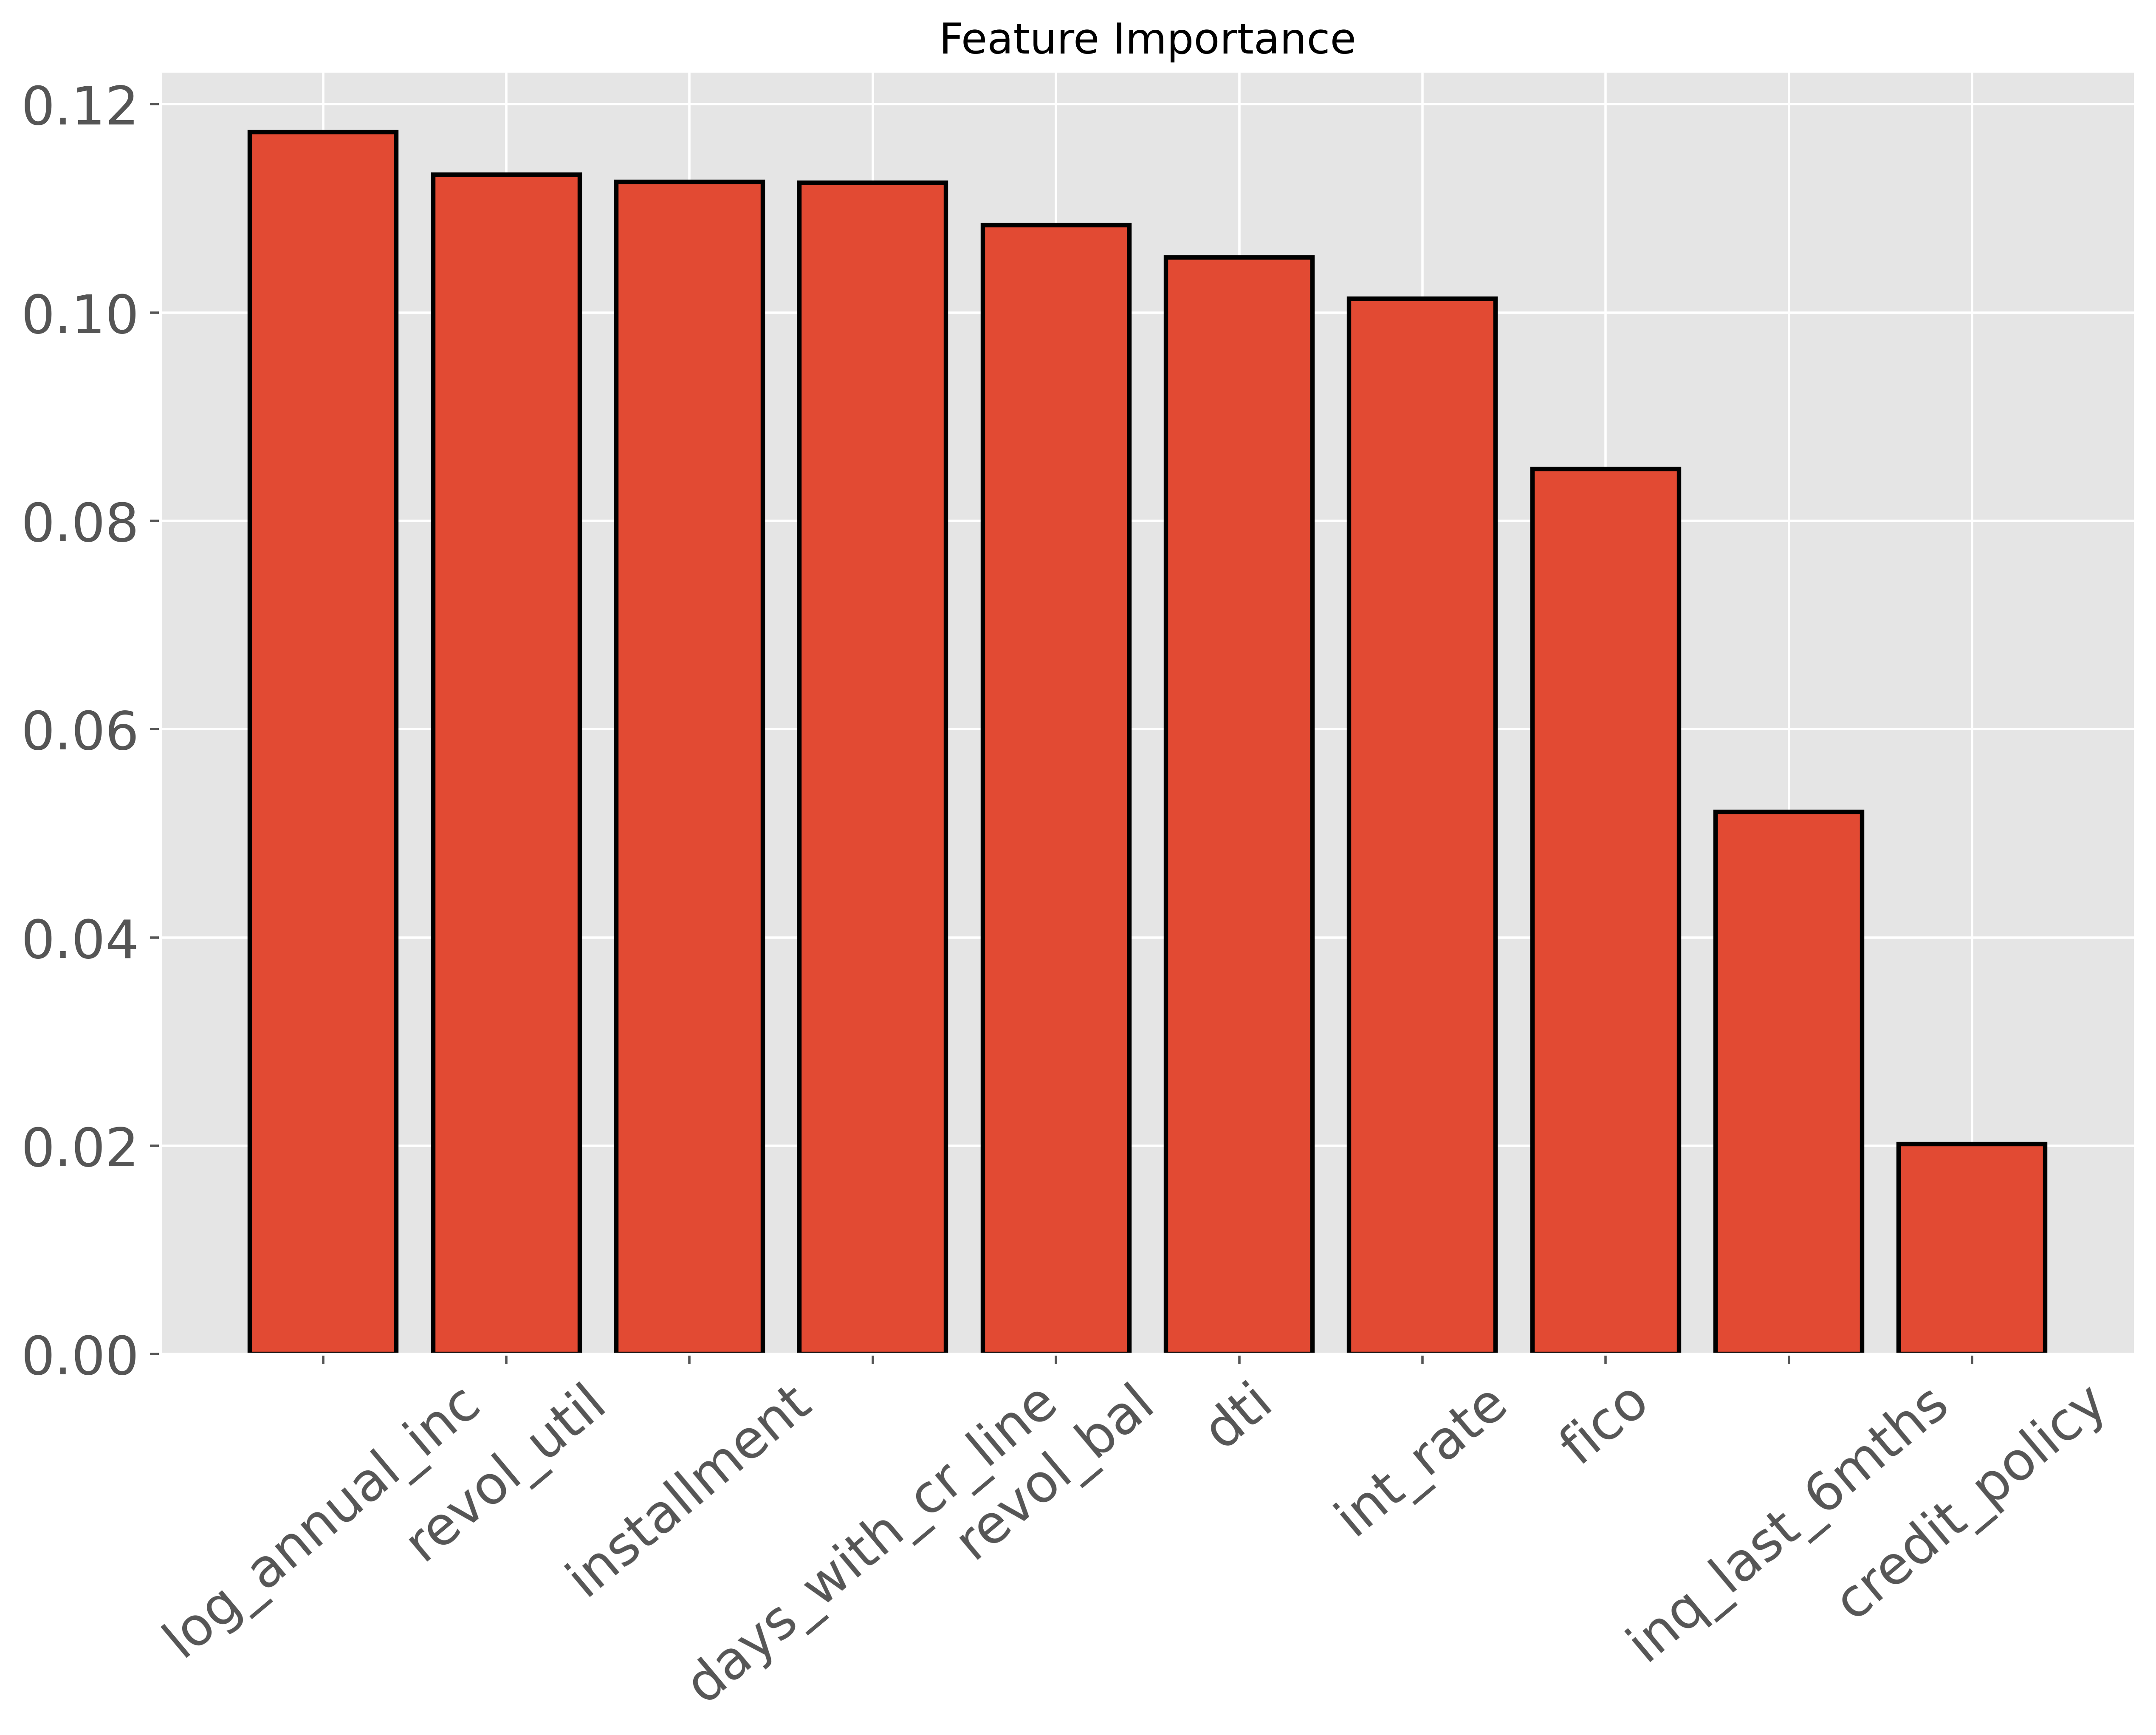

In [66]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
cols = X.columns.to_numpy()
col_sort = cols[indices]
importance_sort = importances[indices]
    
fig, ax = plt.subplots(figsize=(12,8))
plt.title('Feature Importance')
plt.bar(col_sort[:10], importance_sort[:10],  edgecolor='black', lw=1.5)
# ax.tick_params( labelsize=18, rotation=40)
plt.xticks(rotation=40, size=18)
plt.yticks(size=18)
plt.savefig('importance_hist.png')
plt.show()

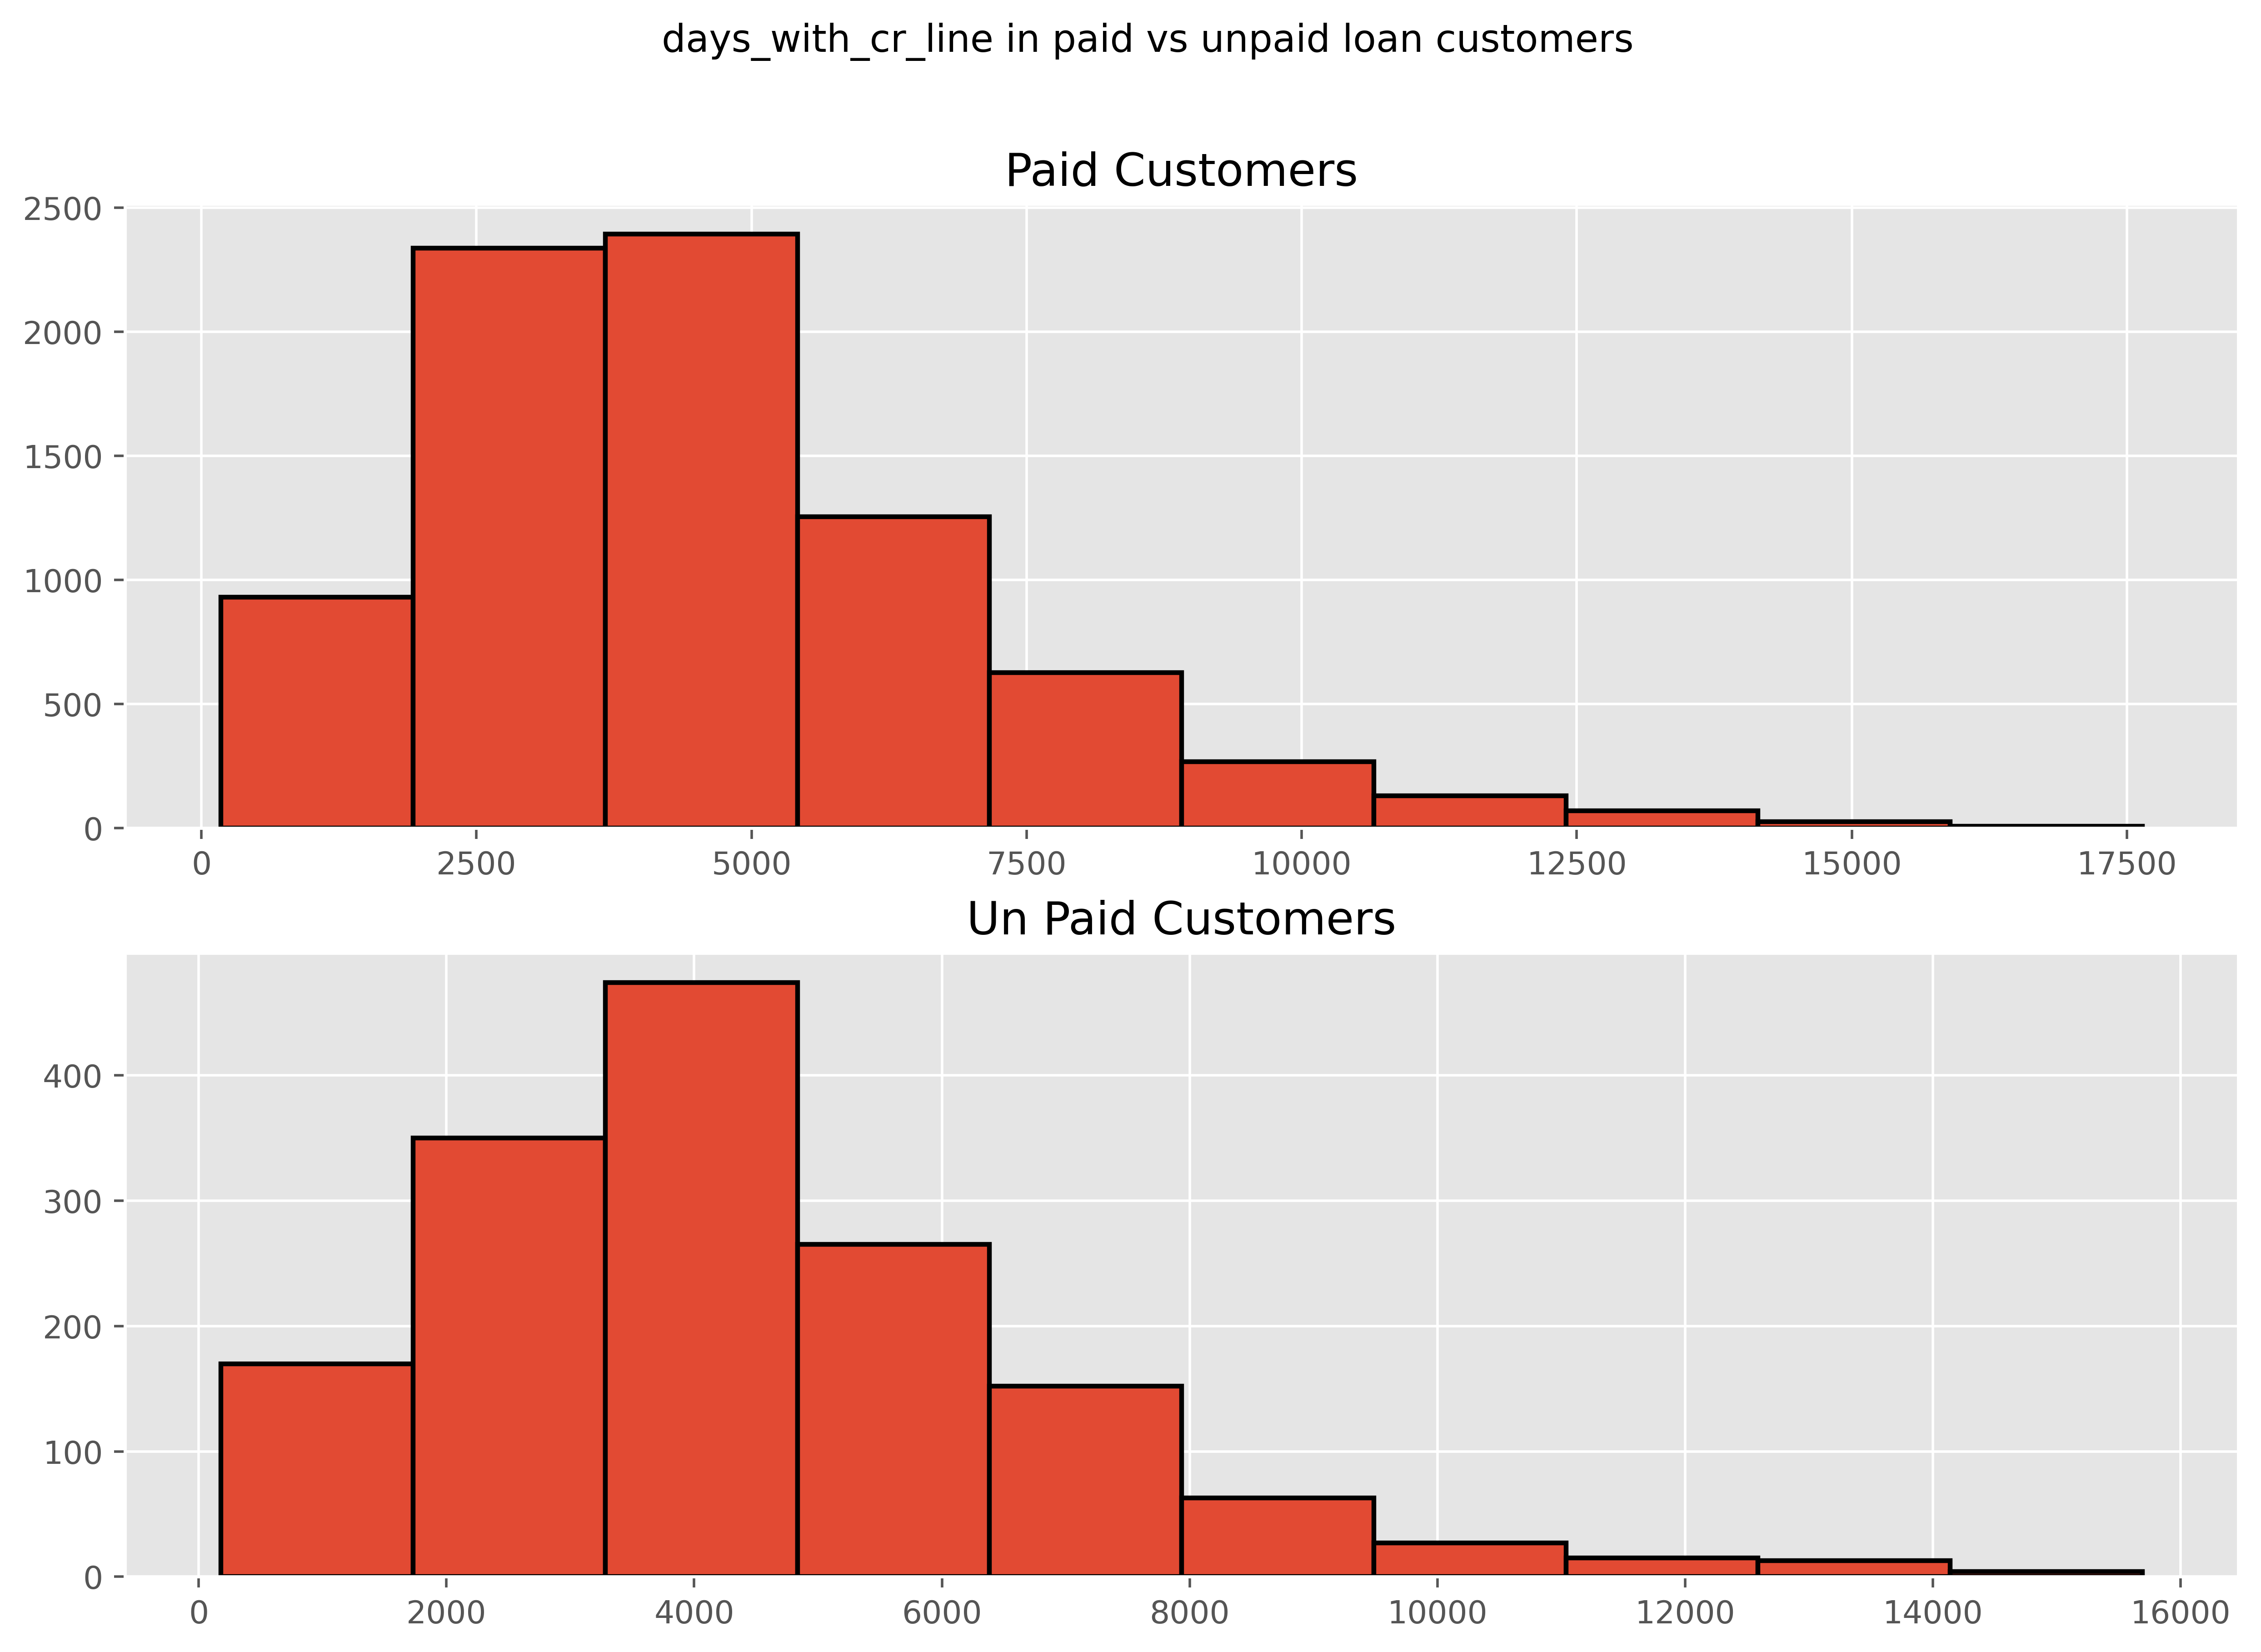

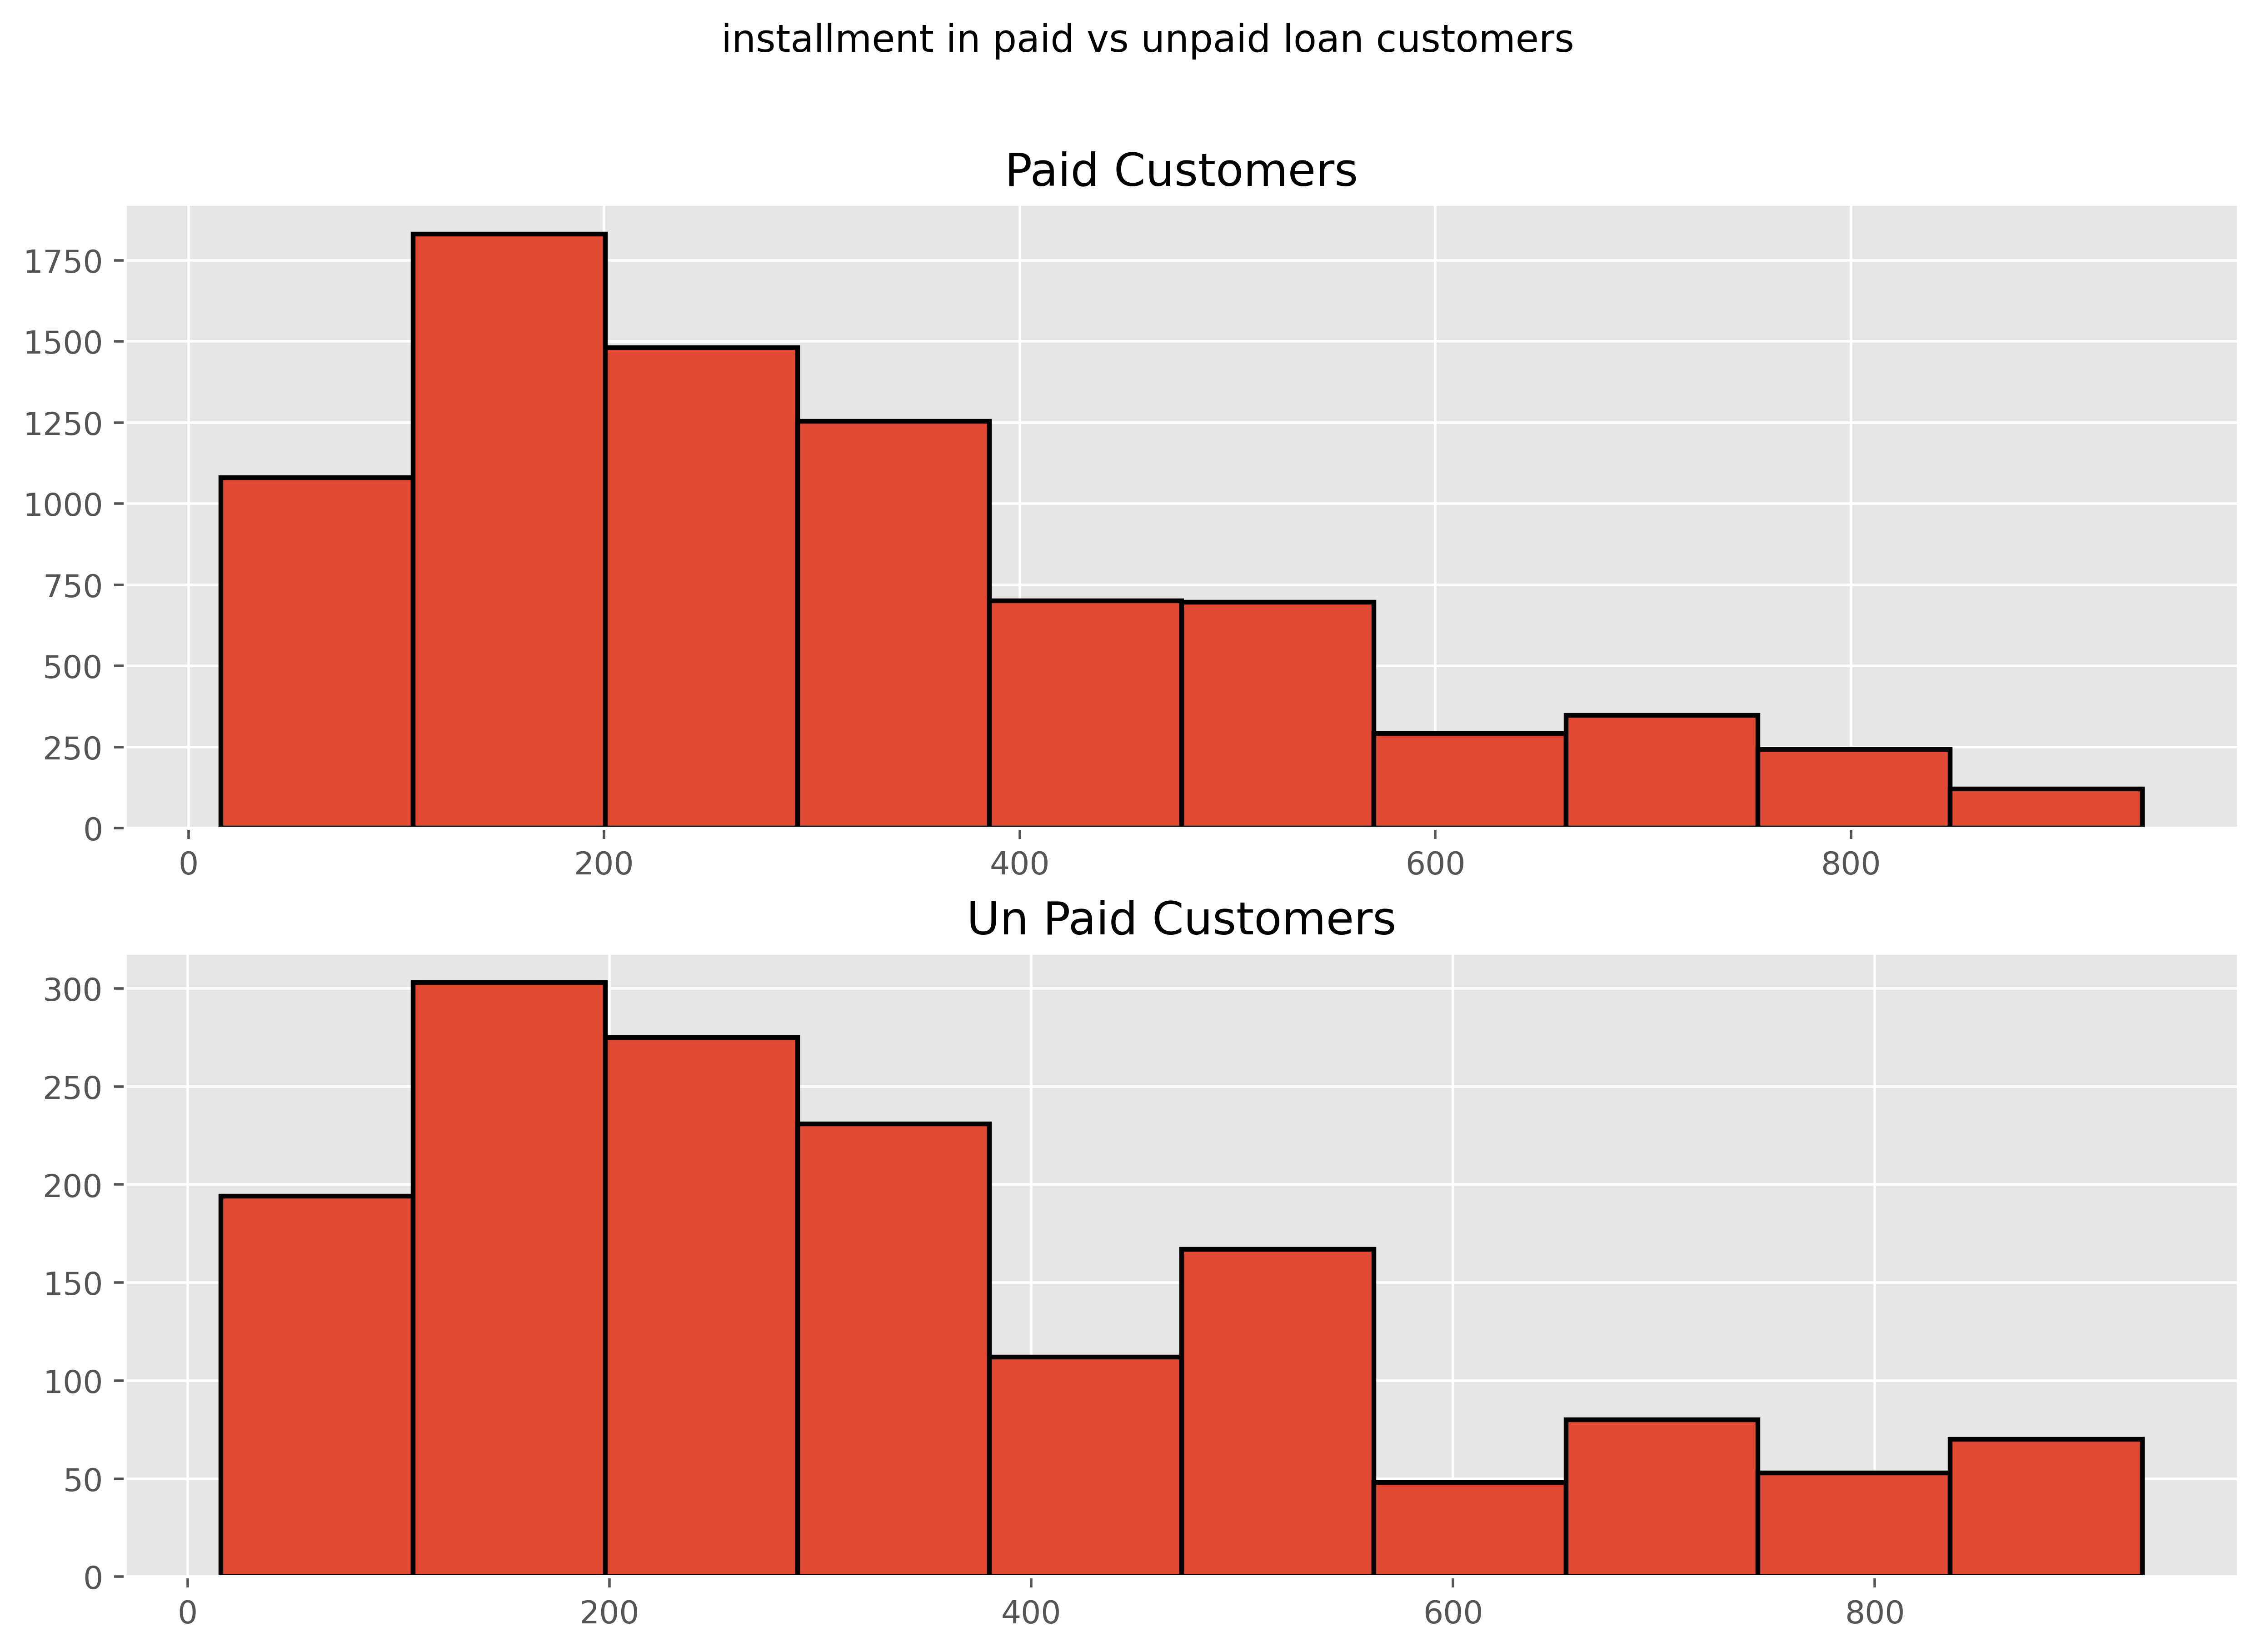

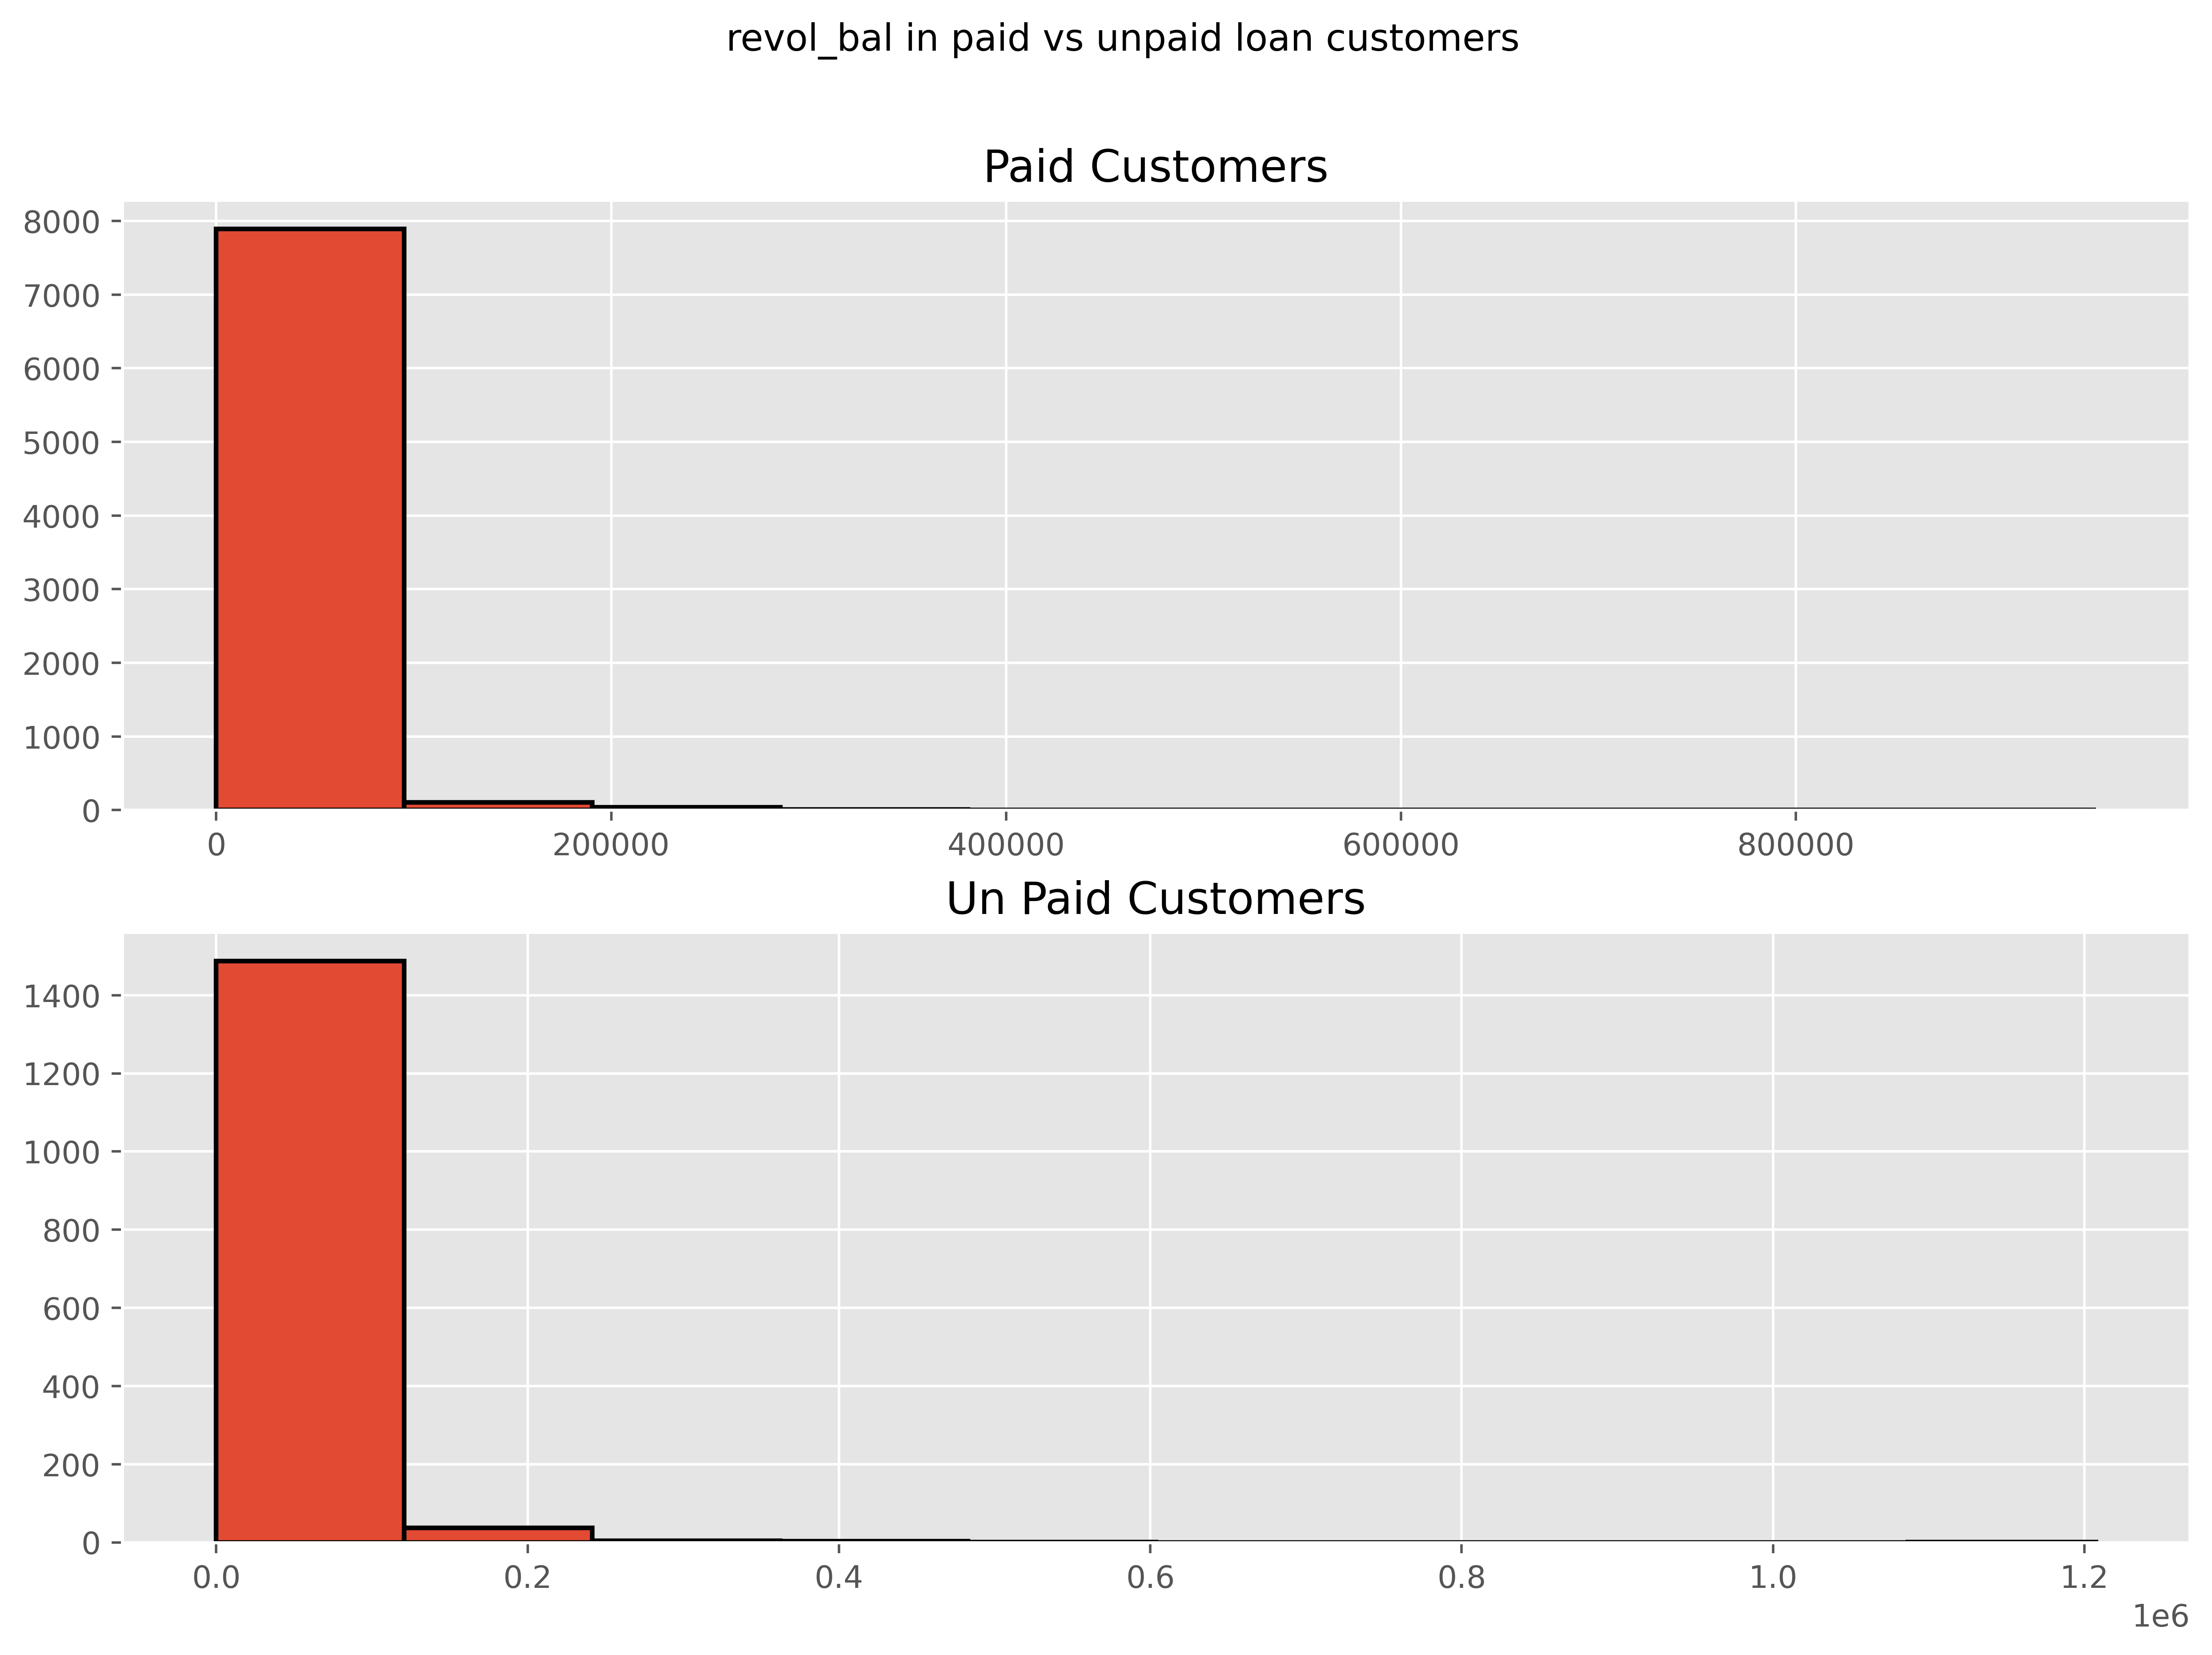

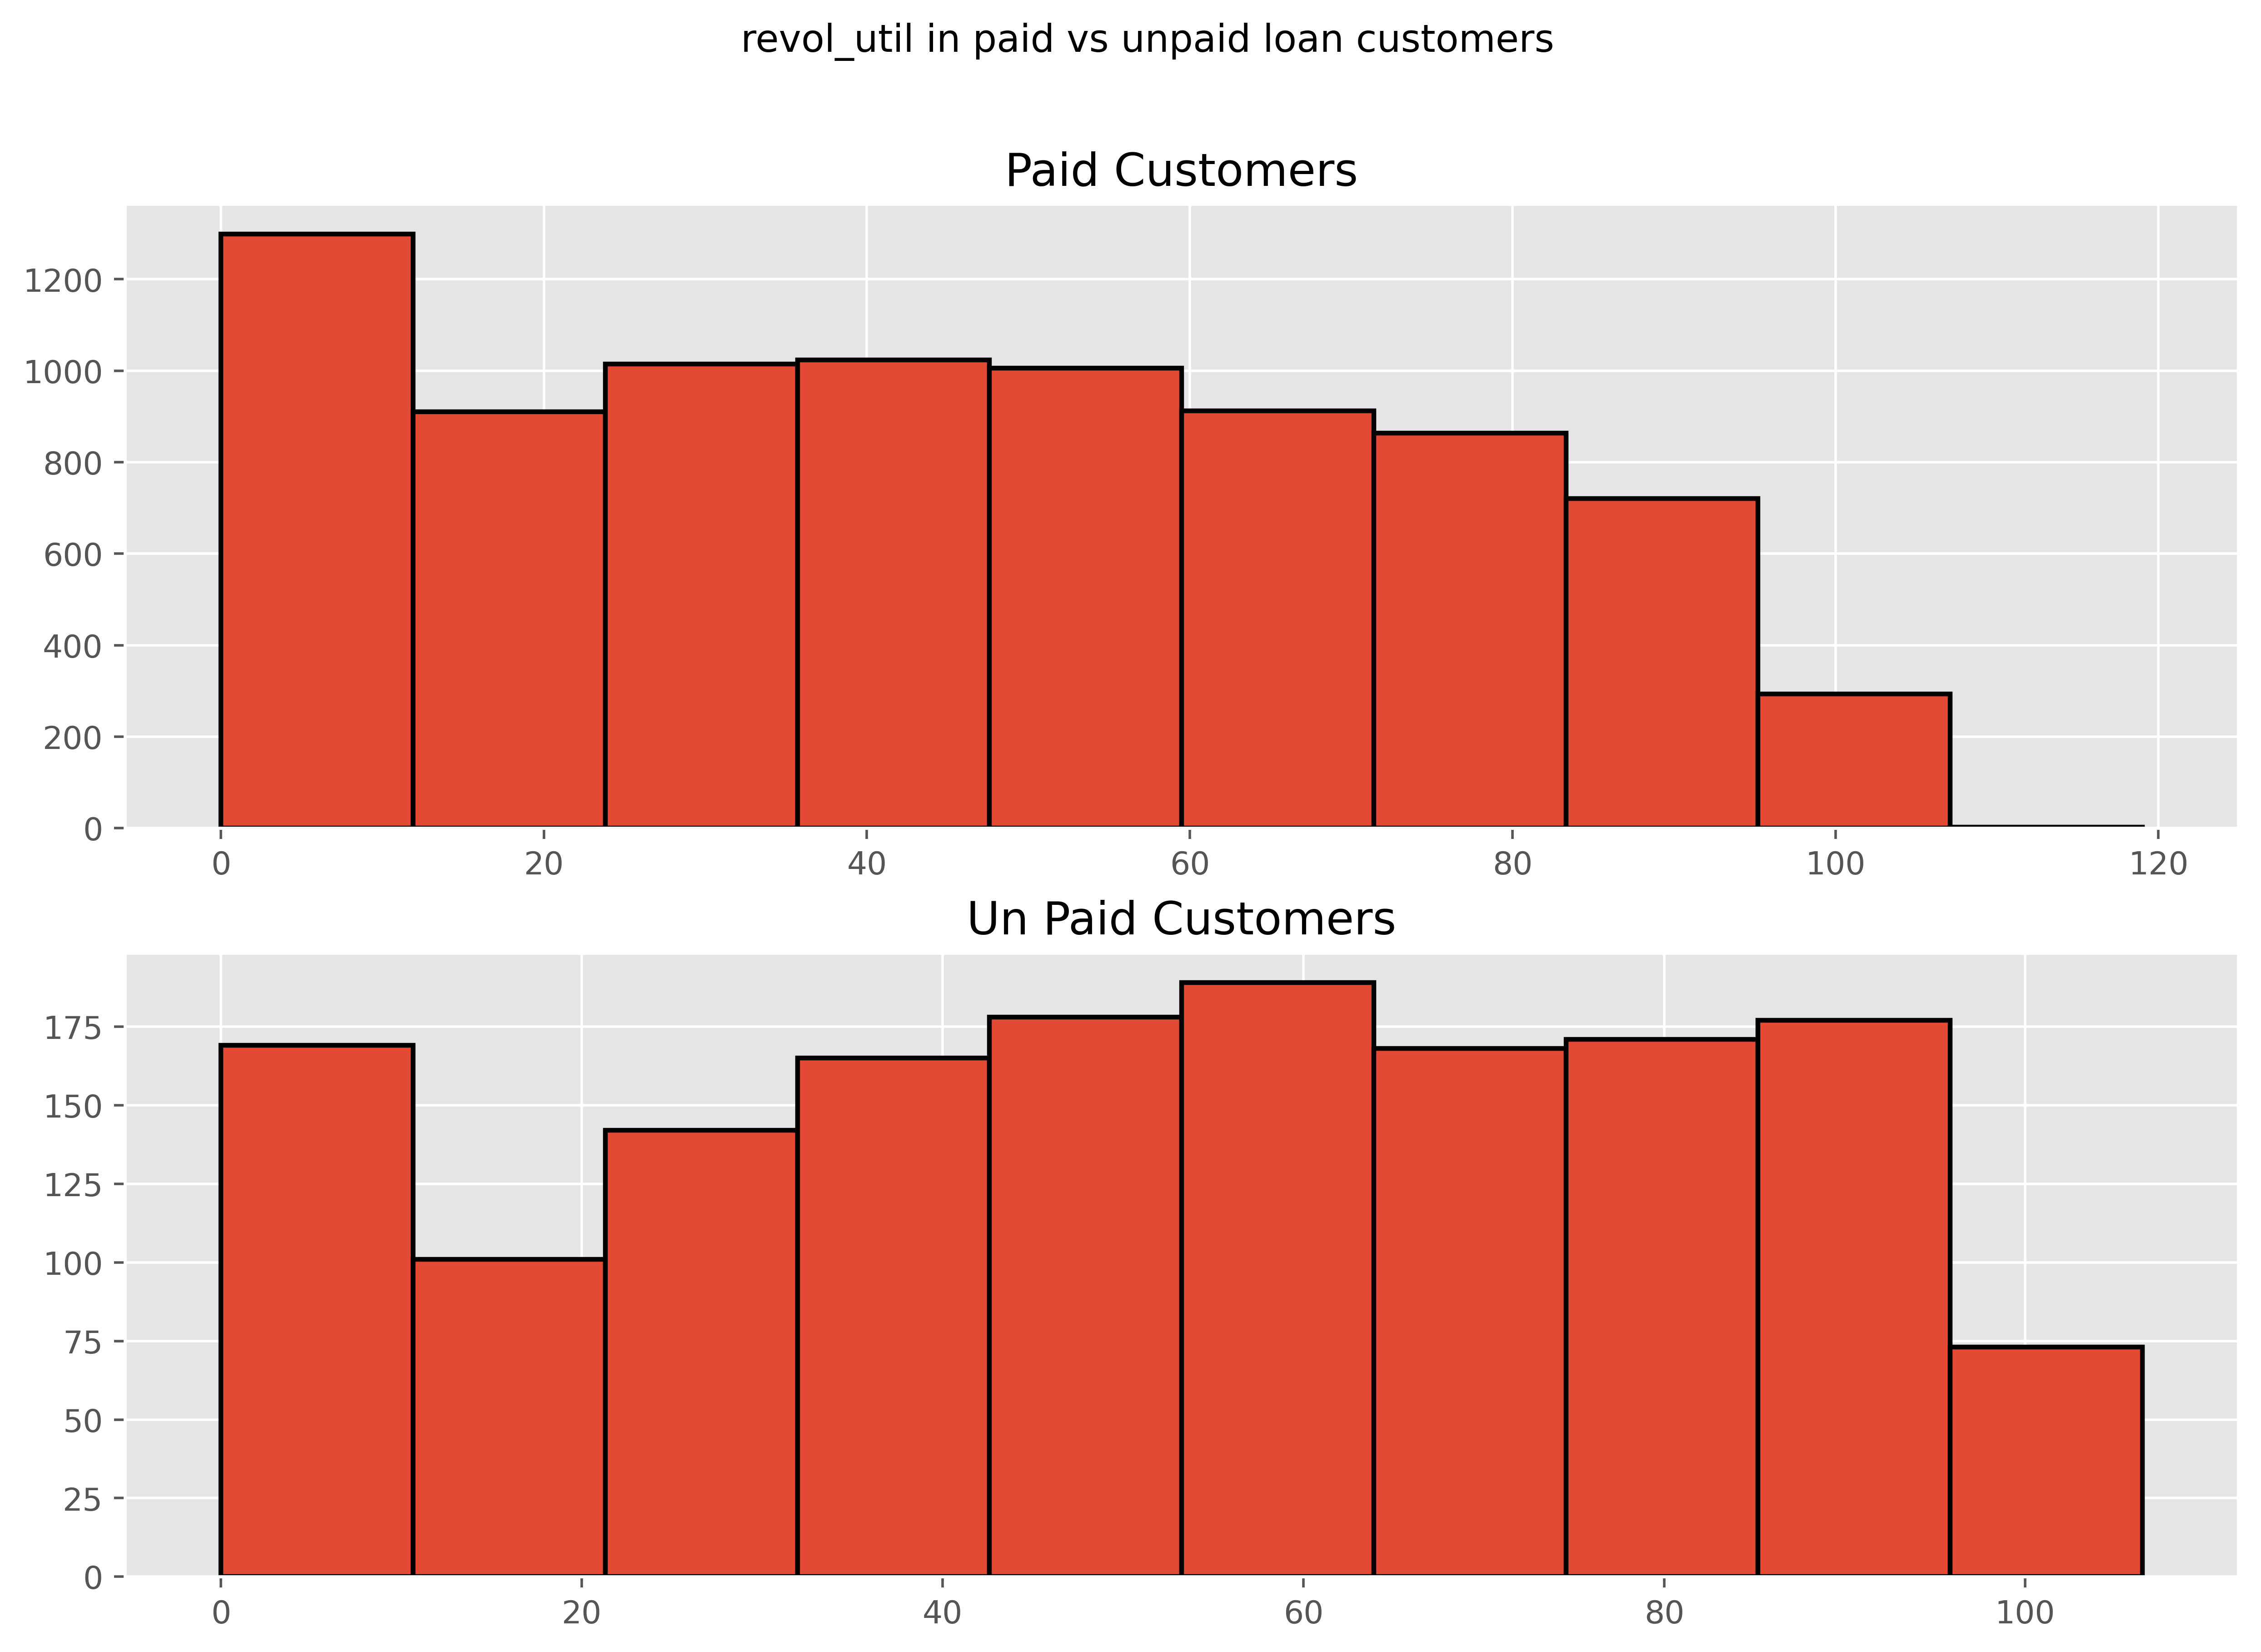

In [67]:
top_four = ['days_with_cr_line', 'installment', 'revol_bal', 'revol_util']

for var in top_four:
    fig, ax = plt.subplots(2, figsize=(12,8))
    fig.suptitle(f'{var} in paid vs unpaid loan customers')
    ax[0].hist(paid_customers[var], edgecolor='black', lw=1.5)
    ax[0].set_title('Paid Customers')
    ax[1].hist(un_paid_customers[var], edgecolor='black', lw=1.5)
    ax[1].set_title('Un Paid Customers')
    plt.savefig(f'../images/{var}.png')

In [68]:
y_train

333     1
7495    0
946     0
2127    0
3348    0
       ..
2415    0
513     0
3931    0
2814    0
1242    0
Name: unpaid, Length: 7662, dtype: int64

In [69]:
est = RandomForestClassifier(n_jobs=-1)

grid = {'max_depth':[3, 5, None],
           'max_features': [1, 2, 3, 4, None],
           'min_samples_split': [2, 4, 8],
           'min_samples_leaf': [1, 5, 10, 20],
           'bootstrap' : [True, False],
           'n_estimators':[50, 100, 200],
           'random_state': [1]}

gridsearch = RandomizedSearchCV(est, grid, scoring='precision', n_iter= 100, cv = 5, verbose = True)
gridsearch.fit(X_train,y_train)
#The best model itself, which you can run .predict/.predict_proba etc on as normal
model = gridsearch.best_estimator_
#the gridsearch object has some further info 
print(f'Best Params: {gridsearch.best_params_}')
print(f'Best F1 Score: {gridsearch.best_score_:.3f}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/casey/opt/anaconda3/lib/pytho

Best Params: {'random_state': 1, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1, 'max_depth': None, 'bootstrap': True}
Best F1 Score: 0.560


In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/casey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [64]:
from scipy.stats import randint
est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features': ['sqrt', 'log2', None],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),}

In [70]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    print(f'ht params: {ht_params}')
    print(f'ht score: {ht_score}')
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X, y)

ht params: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 300}
ht score: 0.8399457089162664


In [67]:
claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=300,bootstrap= True,criterion='entropy',max_depth=3,max_features=2,min_samples_leaf= 3)


In [82]:
## Cross Validation good for selecting models
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(claasifier,X,y,cv=10,scoring='accuracy').mean()
cross_val

0.8399459685578357

Text(0, 0.5, 'Feature Importance')

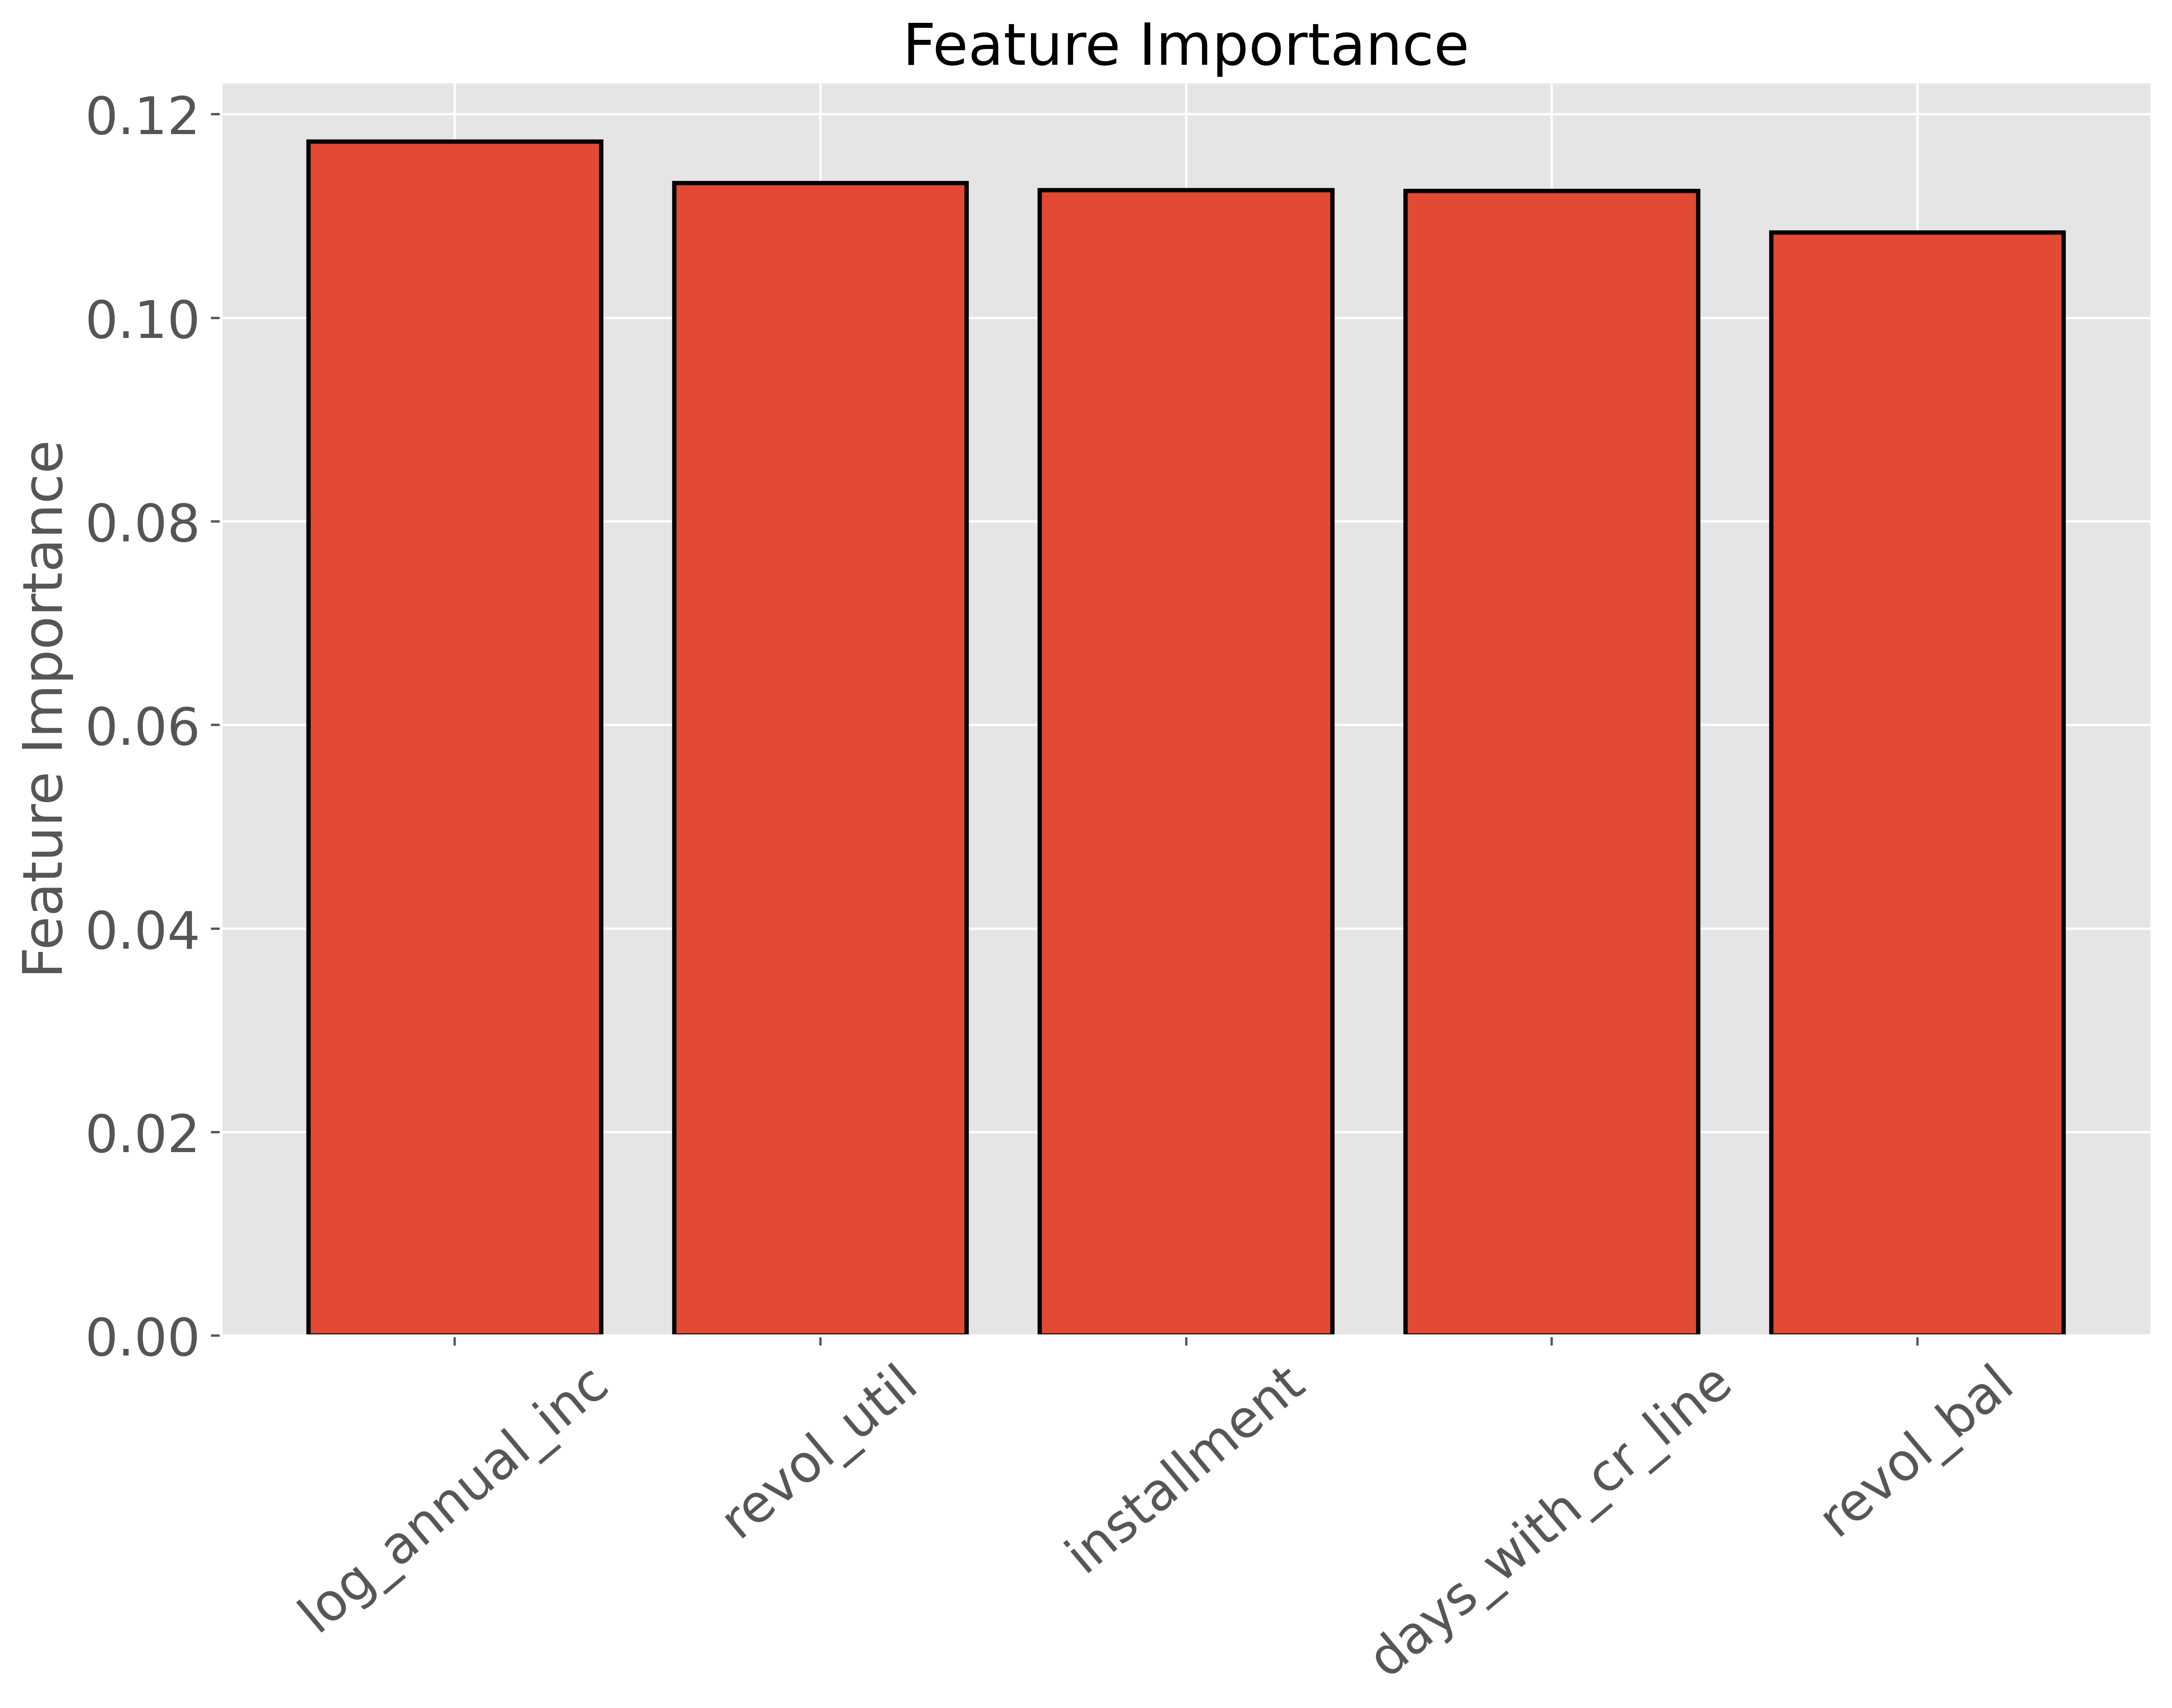

In [75]:
cols = X.columns.to_numpy()
col_sort = cols[indices]
importance_sort = importances[indices]
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Feature Importance', size=20)
plt.bar(col_sort[:5], importance_sort[:5], edgecolor='black', lw=1.5)
plt.xticks(rotation=40, size=18)
plt.yticks(size=18)
#plt.xlabel('Feature', size=19)
plt.ylabel('Feature Importance', size=19)
# plt.show()
# plt.savefig('importance_hist_pycharm_gb.png')